____    
@laraball07 telegram

lpopfalushi@yandex.ru

+79859667491 Лариса Попфалуши 

# Startups operations/close predictions
_____
## Описание исследования

Разработать модель для предсказания успешности стартапа (закроется или нет)
_____
## Цель исследования
    
Разработать решение, которое позволит проанализировать данные по стратапам за 1970-2018 гг, спрогнозировать закрытие и причины, для разработки рекомендаций по критериям, влияющим на успешность стартапов. 
    
_____
## Задачи исследования
Построить модель, которая сможет предсказать закроется стартап или нет  на основе данных заказчика.
_____
### Исходные данные.
    
Датасет состоит из двух файлов: тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

kaggle_startups_train_01.csv - информация (53 000) стартапах, которые будут использоваться в качестве обучающих данных.
kaggle_startups_test_01.csv - информация (13 000) стартапах, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'status' для каждого стартапа из этого датасета.
kaggle_startups_sample_submit_01.csv - файл с примером предсказаний в правильном формате.
name - идентификатор (название) стартапа в тестовом наборе.
status - целевой признак. Для каждого стартапа предскажите категориальное значение соответствующее прогнозу ['operating', 'closed'].
Описание полей данных
name - Название стартапа
category_list - Список категорий, к которым относится стартап
funding_total_usd - Общая сумма финансирования в USD
status - Статус стартапа (закрыт или действующий)
country_code - Код страны
state_code - Код штата
region - Регион
city - Город
funding_rounds - Количество раундов финансирования
founded_at - Дата основания
first_funding_at - Дата первого раунда финансирования
last_funding_at - Дата последнего раунда финансирования
closed_at - Дата закрытия стартапа (если применимо)
lifetime - Время существования стартапа в днях

______

## Предсказание закроется стартап или нет

### Шаг 1. Загрузка данных: (#1_1-bullet)
* [1. Загрузим данные.]
* [2. Проверим, что данные в таблицах соответствуют описанию.](#1_2-bullet)
* [3. Вывод.](#1_3-bullet)

### Шаг 2. Предобработка данных: (#2_1-bullet)
* [1. Предообработка выборки train.]
* [2. Предообработка выборки test.](#2_2-bullet)
* [3. Вывод.](#2_3-bullet)

### Шаг 3. Исследовательский анализ данных (#3_1-bullet)
* [1. Проведение статистического анализа всех признаков и таблиц.]
* [2. Вывод.](#3_2-bullet)

### Шаг 4. Подготовка данных (#4_1-bullet)
* [1. Пайплайн с шагом предобработки данных.]

### Шаг 5. Обучение моделей (#5_1-bullet)
* [1. Поиск гиперпараметров моделей с помощью GridSearchCV]
* [2. Pipelines+Optuna+GBDT.](#5_2-bullet)
* [3. Вывод.](#5_3-bullet)

### Шаг 6. Оформление выводов
* [1. Выводы о том, какая модель справилась лучше и почему.](#6_1-bullet)

## Составление портета успешного стартапа
### Шаг 7. Анализ признаков:
* [1. Анализ проведенных исследований и формирование выводов.](#7_1-bullet)

### Шаг 8. Общий вывод
* [1. опишем задачу; опишем исходные данные и проведённую предобработку; напишем, что сделали для поиска лучшей модели; укажем лучшую модель; добавим выводы и дополнительные предложения для бизнеса.](#8_1-bullet)

## Исследование

## Предсказание закрытия стартапа

### Шаг 1. Загрузка данных:<a id='#1_1-bullet'></a>

In [2]:
# !pip install scikit-learn==1.1.3 -q
# !pip install shap -q
# !pip install phik -q
# !pip install matplotlib==3.6.0
# !pip install seaborn -q
# !pip install pandas_profiling  -q
# !pip install optuna -q
# !pip install catboost -q 

# !pip install xgboost -q 



# Датасеты
import pandas as pd
from scipy import stats

from scipy import stats as st
#from scipy.stats import ttest_ind

from collections import Counter


# для создания двойного пути к базе данных
import os

# Математика
import numpy as np
# from math import sqrt
# import datetime as dt
# import math as mth

# Графики
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', 100)
# оставим всего три знака после запятой у чисел с плавающей точкой
pd.set_option('display.float_format', '{:.3f}'.format)
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 16),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style('darkgrid')
sns.set_palette('Accent') 
sns.set_context('notebook', rc={'legend.fontsize': 10.0})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# библиотеки для работы с дашбордами
# import sys

# доустанавливаем необходимые библиотеки



# !pip install optuna-integration -q

#Библиотека sklearn

import sklearn 



from sklearn.model_selection import (
    # train_test_split,
    # RandomizedSearchCV,
    GridSearchCV,
    cross_val_score
)

from sklearn.metrics import (
    f1_score,
    #roc_auc_score,
    #make_scorer
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder,
    PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectKBest, f_classif

import shap

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

from catboost import CatBoostClassifier, Pool

import optuna
from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna import visualization 

from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

# импорт класса дамми-модели 
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

# Version
print('sklearn', sklearn.__version__)  #> 0.9.0
print('mpl', mpl.__version__)  #> 3.6.0
print('sns', sns.__version__)  #> 0.9.0
print('shap', shap.__version__)  #> 0.9.0
print('phik', phik.__version__)  #> 3.6.0
print('optuna', optuna.__version__) 

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


sklearn 1.4.1.post1
mpl 3.6.0
sns 0.13.2
shap 0.45.0
phik 0.12.4
optuna 3.6.1


In [3]:
# Задаем параметры для разделения данных
RANDOM_STATE = 100
TEST_SIZE = 0.20

In [4]:
pth1 = './datasets/kaggle_startups_train_27042024.csv'
pth1_1 = '/datasets/kaggle_startups_train_27042024.csv'
pth2 = './datasets/kaggle_startups_test_27042024.csv'
pth2_1 = '/datasets/kaggle_startups_test_27042024.csv'

def loadFile(path1, path2):
    if os.path.exists(path1):
        return pd.read_csv(path1)
    elif os.path.exists(path2):
        return pd.read_csv(path2)
    else:
        print("No file exists:" ,path1, path2)

startup_train = loadFile(pth1, pth1_1)
startup_test = loadFile(pth2, pth2_1)

Проверка данных:<a id='#1_2-bullet'></a>

In [5]:
# Изучение датафрейма 'startup_train' 
def inspectDataframe(df):
    df.info()
    return df.head()
inspectDataframe(startup_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52513 non-null  object 
 1   category_list      50049 non-null  object 
 2   funding_total_usd  42445 non-null  float64
 3   status             52514 non-null  object 
 4   country_code       47013 non-null  object 
 5   state_code         45752 non-null  object 
 6   region             46156 non-null  object 
 7   city               46156 non-null  object 
 8   funding_rounds     52514 non-null  int64  
 9   founded_at         52514 non-null  object 
 10  first_funding_at   52514 non-null  object 
 11  last_funding_at    52514 non-null  object 
 12  closed_at          4915 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


name                          category_list  \
0               Lunchgate        Online Reservations|Restaurants   
1                 EarLens  Manufacturing|Medical|Medical Devices   
2  Reviva Pharmaceuticals                          Biotechnology   
3    Sancilio and Company                            Health Care   
4     WireTough Cylinders                          Manufacturing   

   funding_total_usd     status country_code state_code       region  \
0         828626.000  operating          CHE         25       Zurich   
1       42935019.000  operating          USA         CA  SF Bay Area   
2       35456381.000  operating          USA         CA  SF Bay Area   
3       22250000.000  operating          NaN        NaN          NaN   
4                NaN  operating          USA         VA   VA - Other   

           city  funding_rounds  founded_at first_funding_at last_funding_at  \
0        Zürich               2  2009-12-31       2011-05-01      2014-12-01   
1  Redwood City               4  2005-01-01       2010-05-04      2014-02-25   
2      San Jose               3  2006-01-01       2012-08-20      2014-07-02   
3           NaN               3  2004-01-01       2011-09-01      2014-07-18   
4       Bristol               1  2010-09-30       2012-02-01      2012-02-01   

  closed_at  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [6]:
inspectDataframe(startup_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   founded_at         13125 non-null  object 
 9   first_funding_at   13125 non-null  object 
 10  last_funding_at    13125 non-null  object 
 11  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


name                   category_list  funding_total_usd  \
0              Crystalsol                Clean Technology        2819200.000   
1        JBI Fish & Wings                     Hospitality                NaN   
2                COINPLUS                         Finance         428257.000   
3  Imagine Communications  Software|Video|Video Streaming       34700000.000   
4                   DNA13                        Software        4530000.000   

  country_code state_code            region              city  funding_rounds  \
0          NIC         17               NaN               NaN               1   
1          USA         TN        TN - Other          Humboldt               1   
2          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2   
3          USA         CA         San Diego         San Diego               4   
4          CAN         ON            Ottawa            Ottawa               1   

   founded_at first_funding_at last_funding_at  lifetime  
0  2008-06-01       2009-07-01      2009-07-01      3501  
1  2010-07-25       2010-07-28      2010-07-28      2717  
2  2014-06-16       2014-05-15      2014-09-18      1295  
3  2005-01-01       2005-01-01      2010-04-20      4748  
4  2001-01-01       2007-05-08      2007-05-08      6209

**Вывод по загрузке данных**<a id='#1_3-bullet'></a>

Данные состоят из одного набора данных, разделенных на тренировочну и тестовую выборки:

1. startup_train: содержит 52514 записей с 13 столбцами. Данные успешно загружены
2. startup_test: содержит 13125 записей с 12 столбцами. Данные успешно загружены

Все данные в таблицах соответствуют описанию и готовы к дальнейшему анализу.


### Шаг 2. Предобработка данных: <a id='#2_1-bullet'></a>

In [7]:
 def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print('Информация общая: ')
    df.info()
    print('---------------------------------------------------------------------------------------------------------')
    print('Статистики: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print('Пропущенные значения: ')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Дублированные данные: ')
    print(df.duplicated().sum())

**Предообработка выборки train**: <a id='#2_1-bullet'></a>

In [8]:
# Изучение датафрейма 'train_job_satisfaction_rate'
df_review(startup_train)

name                          category_list  \
0               Lunchgate        Online Reservations|Restaurants   
1                 EarLens  Manufacturing|Medical|Medical Devices   
2  Reviva Pharmaceuticals                          Biotechnology   
3    Sancilio and Company                            Health Care   
4     WireTough Cylinders                          Manufacturing   

   funding_total_usd     status country_code state_code       region  \
0         828626.000  operating          CHE         25       Zurich   
1       42935019.000  operating          USA         CA  SF Bay Area   
2       35456381.000  operating          USA         CA  SF Bay Area   
3       22250000.000  operating          NaN        NaN          NaN   
4                NaN  operating          USA         VA   VA - Other   

           city  funding_rounds  founded_at first_funding_at last_funding_at  \
0        Zürich               2  2009-12-31       2011-05-01      2014-12-01   
1  Redwood City               4  2005-01-01       2010-05-04      2014-02-25   
2      San Jose               3  2006-01-01       2012-08-20      2014-07-02   
3           NaN               3  2004-01-01       2011-09-01      2014-07-18   
4       Bristol               1  2010-09-30       2012-02-01      2012-02-01   

  closed_at  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

---------------------------------------------------------------------------------------------------------
Информация общая: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52513 non-null  object 
 1   category_list      50049 non-null  object 
 2   funding_total_usd  42445 non-null  float64
 3   status             52514 non-null  object 
 4   country_code       47013 non-null  object 
 5   state_code         45752 non-null  object 
 6   region             46156 non-null  object 
 7   city               46156 non-null  object 
 8   funding_rounds     52514 non-null  int64  
 9   founded_at         52514 non-null  object 
 10  first_funding_at   52514 non-null  object 
 11  last_funding_at    52514 non-null  object 
 12  closed_at          4915 non-null   object 
dtypes: float64(1), int64(1), object(11)
memor

funding_total_usd  funding_rounds
count          42445.000       52514.000
mean        18248255.980           1.741
std        187121675.710           1.375
min                1.000           1.000
25%           336000.000           1.000
50%          2000000.000           1.000
75%         10000000.000           2.000
max      30079503000.000          19.000

---------------------------------------------------------------------------------------------------------
Пропущенные значения: 
name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5501
state_code            6762
region                6358
city                  6358
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64
---------------------------------------------------------------------------------------------------------
Дублированные данные: 
0


In [9]:
# изменим тип данных с 'object' на 'date'
startup_train['founded_at'] = pd.to_datetime(startup_train['founded_at'], format='%Y-%m-%d')
startup_train['first_funding_at'] = pd.to_datetime(startup_train['first_funding_at'], format='%Y-%m-%d')
startup_train['last_funding_at'] = pd.to_datetime(startup_train['last_funding_at'], format='%Y-%m-%d')
startup_train['closed_at'] = pd.to_datetime(startup_train['closed_at'], format='%Y-%m-%d')


In [10]:
# Обработка пропуска в столбце "closed_at"
startup_train['closed_at'] = startup_train['closed_at'].fillna('2018-01-01')
# Проверка 
startup_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          52514 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [11]:
# Добавим столбец lifetime
startup_train['lifetime'] = startup_train.apply(lambda x: x['closed_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['lifetime'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          52514 non-null  datetime64[ns]
 13  lifetime           52514 non-null  int64         
dtypes: dat

0    2923
1    4748
2    4383
3    5114
4    2650
Name: lifetime, dtype: int64

In [12]:
# Добавим столбец delta_invest&open_time время между первой инвестицией и открытием компании
startup_train['delta_invest&open_time'] = startup_train.apply(lambda x: x['first_funding_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['delta_invest&open_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

0     486
1    1949
2    2423
3    2800
4     489
Name: delta_invest&open_time, dtype: int64

In [13]:
# # Добавим столбец delta_invest&open_time время между последней инвестицей и датой открытия - данный синтетич признак ухудшил предсказательную способность модели
# startup_train['delta_invest_last_open_time'] = startup_train.apply(lambda x: x['last_funding_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

# startup_train.info()
# startup_train['delta_invest_last_open_time'].head()


In [14]:
# Добавим столбец delta_invest_time
startup_train['delta_funding_time'] = startup_train.apply(lambda x: x['last_funding_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_train.info()
startup_train['delta_funding_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

0    1310
1    1393
2     681
3    1051
4       0
Name: delta_funding_time, dtype: int64

In [15]:
startup_train['founded_year'] = startup_train['founded_at'].dt.year

startup_train['founded_year'].head()

0    2009
1    2005
2    2006
3    2004
4    2010
Name: founded_year, dtype: int32

In [16]:
# Выявление уникальных значений категориальных столбцов
for column in startup_train.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения для {column}:')
    print(startup_train[column].unique())

Уникальные значения для name:
['Lunchgate' 'EarLens' 'Reviva Pharmaceuticals' ... 'Taskforce'
 'NetScaler' 'Apparcando']
Уникальные значения для category_list:
['Online Reservations|Restaurants' 'Manufacturing|Medical|Medical Devices'
 'Biotechnology' ... 'Gambling|Games|Online Gaming|Sports'
 'Aerospace|Mobile|Transportation|Travel'
 'Online Rental|Parking|Price Comparison']
Уникальные значения для status:
['operating' 'closed']
Уникальные значения для country_code:
['CHE' 'USA' nan 'GBR' 'RUS' 'ESP' 'FRA' 'SWE' 'IND' 'KOR' 'AUS' 'TWN'
 'CHN' 'HUN' 'CAN' 'FIN' 'BRA' 'EGY' 'PRT' 'ISR' 'CHL' 'SVK' 'NLD' 'ARG'
 'ARE' 'JPN' 'IRL' 'DEU' 'LBN' 'EST' 'IDN' 'BEL' 'MEX' 'DNK' 'ITA' 'GRC'
 'ROM' 'TUR' 'SGP' 'SAU' 'MYS' 'NGA' 'QAT' 'VNM' 'BGR' 'GHA' 'UGA' 'JOR'
 'AUT' 'PAK' 'NZL' 'HKG' 'ZAF' 'LVA' 'NOR' 'HRV' 'VEN' 'PER' 'LUX' 'SVN'
 'POL' 'PHL' 'NIC' 'CZE' 'ISL' 'PAN' 'URY' 'BGD' 'MCO' 'GTM' 'THA' 'TTO'
 'UKR' 'KEN' 'CRI' 'DZA' 'LTU' 'CYM' 'MUS' 'BLR' 'SLV' 'COL' 'MLT' 'PSE'
 'BLZ' 'CYP' 'MMR' 

In [17]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_train['funding_total_usd'].apply(lambda x: abs(x - startup_train['funding_total_usd'].mean()) > 3 * startup_train['funding_total_usd'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_train['funding_total_usd'])*100


0.2018509349887649

In [18]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_train['funding_rounds'].apply(lambda x: abs(x - startup_train['funding_rounds'].mean()) > 3 * startup_train['funding_rounds'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_train['funding_rounds'])*100


2.673572761549301

In [19]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_train['lifetime'].apply(lambda x: abs(x - startup_train['lifetime'].mean()) > 3 * startup_train['lifetime'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_train['lifetime'])*100


1.7633392999961917

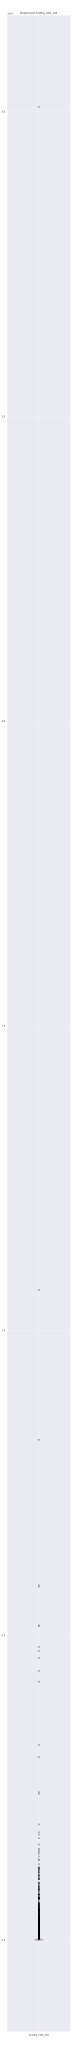

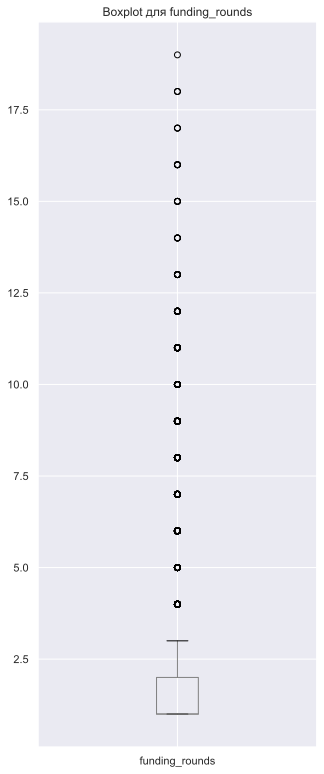

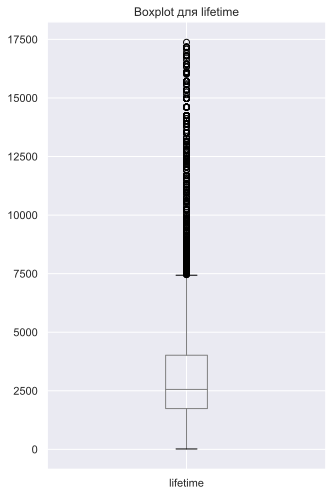

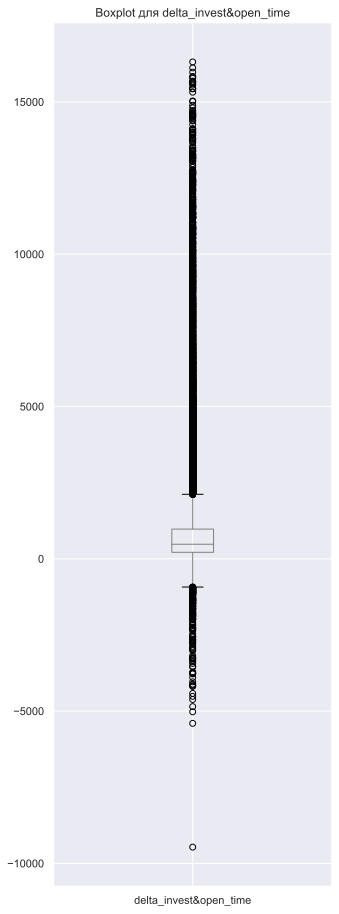

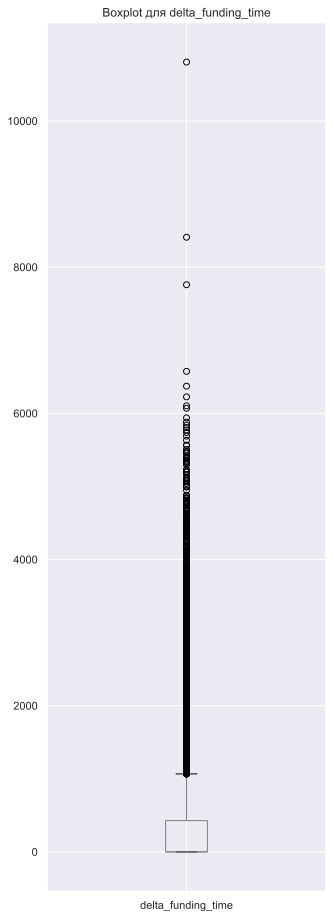

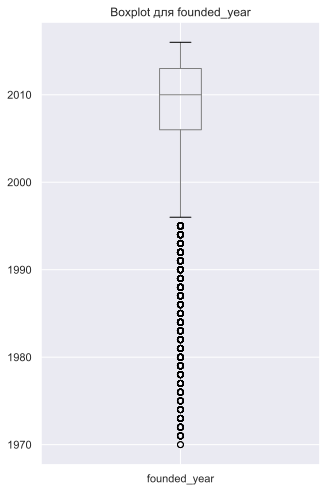

In [20]:
# Проверка на выбросы с помощью boxplot
for column in startup_train.select_dtypes(include=[np.number]).columns:
    if column != 'id':
        # Вычисление размаха данных
        data_range = startup_train[column].max() - startup_train[column].min()
        # data_range / train_job_satisfaction_rate[column].std())
        # Настройка размера графика в зависимости от размаха данных
        plt.figure(figsize=(5, data_range / startup_train[column].std()))
        startup_train.boxplot([column])
        plt.title(f'Boxplot для {column}')
        plt.show()

In [21]:



startup_train['new_category'] = ''

def most_common_category(category_list):
    categories = category_list.split('|')
    return Counter(categories).most_common(1)[0][0]

startup_train['new_category'] = (startup_train['category_list'].astype(str)
                                 .apply(lambda x: x if '|' not in x else most_common_category(x)))

print(startup_train)

                         name                           category_list  \
0                   Lunchgate         Online Reservations|Restaurants   
1                     EarLens   Manufacturing|Medical|Medical Devices   
2      Reviva Pharmaceuticals                           Biotechnology   
3        Sancilio and Company                             Health Care   
4         WireTough Cylinders                           Manufacturing   
...                       ...                                     ...   
52509             Videostream                           Entertainment   
52510             Hello Curry                             Hospitality   
52511               Taskforce   Email|Messaging|Productivity Software   
52512               NetScaler                                Security   
52513              Apparcando  Online Rental|Parking|Price Comparison   

       funding_total_usd     status country_code state_code       region  \
0             828626.000  operating          CH

In [22]:
startup_train['category_list'].value_counts().sort_values(ascending = False).head(21)

category_list
Software               3207
Biotechnology          2905
E-Commerce             1063
Mobile                  920
Clean Technology        892
Curated Web             851
Health Care             744
Hardware + Software     733
Games                   681
Enterprise Software     671
Health and Wellness     613
Manufacturing           604
Advertising             554
Education               422
Semiconductors          400
Finance                 338
Real Estate             338
Consulting              330
Social Media            326
Security                317
Hospitality             278
Name: count, dtype: int64

In [23]:
startup_train['new_category'].value_counts().sort_values(ascending = False).head(21)

new_category
Biotechnology          3592
Software               3322
nan                    2465
E-Commerce             2172
Advertising            1925
Curated Web            1746
Mobile                 1396
Analytics              1314
Apps                   1184
Health Care            1134
Enterprise Software    1110
Clean Technology       1106
Games                  1014
Health and Wellness     956
Hardware + Software     876
Finance                 873
Education               800
Manufacturing           688
Consulting              566
Internet                505
Cloud Computing         495
Name: count, dtype: int64

**Вывод по таблице startup_train:**
- привели стобцы с датой к типу Дата
- добавили 2 столбца: 
    - lifetime время жизни компании, если компания не закрылась то считается по дате выгрузки
    - delta_funding_time время между первой и последней инвестицией
    - delta_invest&open_time время между датой открытия компании и первой инвестицией
    - добавление столбца времени между последней инвестицией и датой открытия ухудшило предсказательную способность модели
    - state_code, region, city - удалим столбцы так как не влияют на предсказательную способность модели
- заполним пропуски в двух столбцах: new_category, funding_total_usd, country_code  - модой/медианой,  в пайплайне
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%. Мы используем модель XGBoost которая устойчива к выбросам, удаление выбросов никак не отразилось на предсказательную способность модели

**Предообработка выборки test:**<a id='#2_2-bullet'></a>

In [24]:
# Изучение датафрейма 'startup_test'
df_review(startup_test)

name                   category_list  funding_total_usd  \
0              Crystalsol                Clean Technology        2819200.000   
1        JBI Fish & Wings                     Hospitality                NaN   
2                COINPLUS                         Finance         428257.000   
3  Imagine Communications  Software|Video|Video Streaming       34700000.000   
4                   DNA13                        Software        4530000.000   

  country_code state_code            region              city  funding_rounds  \
0          NIC         17               NaN               NaN               1   
1          USA         TN        TN - Other          Humboldt               1   
2          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2   
3          USA         CA         San Diego         San Diego               4   
4          CAN         ON            Ottawa            Ottawa               1   

   founded_at first_funding_at last_funding_at  lifetime  
0  2008-06-01       2009-07-01      2009-07-01      3501  
1  2010-07-25       2010-07-28      2010-07-28      2717  
2  2014-06-16       2014-05-15      2014-09-18      1295  
3  2005-01-01       2005-01-01      2010-04-20      4748  
4  2001-01-01       2007-05-08      2007-05-08      6209

---------------------------------------------------------------------------------------------------------
Информация общая: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   founded_at         13125 non-null  object 
 9   first_funding_at   13125 non-null  object 
 10  last_funding_at    13125 non-null  object 
 11  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB
--------------------------------

funding_total_usd  funding_rounds  lifetime
count          10547.000       13125.000 13125.000
mean        16549102.695           1.714  3098.206
std         92172825.632           1.319  2128.489
min                1.000           1.000    79.000
25%           320000.000           1.000  1729.000
50%          2000000.000           1.000  2526.000
75%         10000000.000           2.000  3871.000
max       4715000000.000          15.000 17167.000

---------------------------------------------------------------------------------------------------------
Пропущенные значения: 
name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
founded_at              0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64
---------------------------------------------------------------------------------------------------------
Дублированные данные: 
0


In [25]:
# изменим тип данных с 'object' на 'date'
startup_test['founded_at'] = pd.to_datetime(startup_test['founded_at'], format='%Y-%m-%d')
startup_test['first_funding_at'] = pd.to_datetime(startup_test['first_funding_at'], format='%Y-%m-%d')
startup_test['last_funding_at'] = pd.to_datetime(startup_test['last_funding_at'], format='%Y-%m-%d')

In [26]:
# Добавим столбец delta_invest&open_time
startup_test['delta_invest&open_time'] = startup_test.apply(lambda x: x['first_funding_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

startup_test.info()
startup_test['delta_invest&open_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    13125 non-null  object        
 1   category_list           12534 non-null  object        
 2   funding_total_usd       10547 non-null  float64       
 3   country_code            11743 non-null  object        
 4   state_code              11430 non-null  object        
 5   region                  11536 non-null  object        
 6   city                    11538 non-null  object        
 7   funding_rounds          13125 non-null  int64         
 8   founded_at              13125 non-null  datetime64[ns]
 9   first_funding_at        13125 non-null  datetime64[ns]
 10  last_funding_at         13125 non-null  datetime64[ns]
 11  lifetime                13125 non-null  int64         
 12  delta_invest&open_time  13125 non-null  int64 

0     395
1       3
2     -32
3       0
4    2318
Name: delta_invest&open_time, dtype: int64

In [27]:
# # Добавим столбец delta_invest&open_time
# startup_test['delta_invest_last_open_time'] = startup_test.apply(lambda x: x['last_funding_at'] - x['founded_at'], axis=1).dt.days.astype('int64')

# startup_test.info()
# startup_test['delta_invest_last_open_time'].head()


In [28]:
# Добавим столбец delta_invest_time
startup_test['delta_funding_time'] = startup_test.apply(lambda x: x['last_funding_at'] - x['first_funding_at'], axis=1).dt.days.astype('int64')

startup_test.info()
startup_test['delta_funding_time'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    13125 non-null  object        
 1   category_list           12534 non-null  object        
 2   funding_total_usd       10547 non-null  float64       
 3   country_code            11743 non-null  object        
 4   state_code              11430 non-null  object        
 5   region                  11536 non-null  object        
 6   city                    11538 non-null  object        
 7   funding_rounds          13125 non-null  int64         
 8   founded_at              13125 non-null  datetime64[ns]
 9   first_funding_at        13125 non-null  datetime64[ns]
 10  last_funding_at         13125 non-null  datetime64[ns]
 11  lifetime                13125 non-null  int64         
 12  delta_invest&open_time  13125 non-null  int64 

0       0
1       0
2     126
3    1935
4       0
Name: delta_funding_time, dtype: int64

In [29]:
startup_test['founded_year'] = startup_test['founded_at'].dt.year

startup_test['founded_year'].head()

0    2008
1    2010
2    2014
3    2005
4    2001
Name: founded_year, dtype: int32

In [30]:



startup_test['new_category'] = ''

def most_common_category(category_list):
    categories = category_list.split('|')
    return Counter(categories).most_common(1)[0][0]

startup_test['new_category'] = (startup_test['category_list'].astype(str)
                                 .apply(lambda x: x if '|' not in x else most_common_category(x)))

print(startup_test)

                         name  \
0                  Crystalsol   
1            JBI Fish & Wings   
2                    COINPLUS   
3      Imagine Communications   
4                       DNA13   
...                       ...   
13120                   Jymob   
13121               GlobaTrek   
13122                Inkd.com   
13123                  AdWill   
13124             RingCentral   

                                           category_list  funding_total_usd  \
0                                       Clean Technology        2819200.000   
1                                            Hospitality                NaN   
2                                                Finance         428257.000   
3                         Software|Video|Video Streaming       34700000.000   
4                                               Software        4530000.000   
...                                                  ...                ...   
13120                                         Recr

In [31]:
startup_test['category_list'].value_counts().sort_values(ascending = False).head(21)

category_list
Software               775
Biotechnology          693
E-Commerce             263
Mobile                 255
Clean Technology       234
Curated Web            191
Hardware + Software    181
Games                  180
Health Care            176
Enterprise Software    169
Manufacturing          157
Health and Wellness    148
Advertising            141
Finance                106
Education              101
Semiconductors          96
Security                87
Consulting              87
Real Estate             83
Web Hosting             80
Social Media            79
Name: count, dtype: int64

In [32]:
startup_test['new_category'].value_counts().sort_values(ascending = False).head(21)

new_category
Biotechnology          855
Software               809
nan                    591
E-Commerce             566
Advertising            456
Curated Web            436
Mobile                 374
Analytics              317
Clean Technology       299
Apps                   290
Health Care            282
Games                  265
Enterprise Software    248
Health and Wellness    244
Finance                234
Hardware + Software    219
Education              190
Manufacturing          183
Consulting             145
Android                138
Internet               125
Name: count, dtype: int64

In [33]:
# Выявление уникальных значений категориальных столбцов
for column in startup_test.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения для {column}:')
    print(startup_test[column].unique())

Уникальные значения для name:
['Crystalsol' 'JBI Fish & Wings' 'COINPLUS' ... 'Inkd.com' 'AdWill'
 'RingCentral']
Уникальные значения для category_list:
['Clean Technology' 'Hospitality' 'Finance' ...
 'Design|E-Commerce|Marketplaces|Printing'
 'Advertising Exchanges|Mobile|Mobile Advertising'
 'Communications Hardware|Messaging|Mobile|Office Space|Technology|VoIP']
Уникальные значения для country_code:
['NIC' 'USA' 'LUX' 'CAN' nan 'MYS' 'DEU' 'GBR' 'FRA' 'ITA' 'CHN' 'ARG'
 'NLD' 'IRL' 'AUS' 'CHE' 'CHL' 'ESP' 'IND' 'ISR' 'DNK' 'KOR' 'RUS' 'PHL'
 'URY' 'SGP' 'BRA' 'EGY' 'MEX' 'POL' 'VNM' 'AUT' 'EST' 'BEL' 'DMA' 'PRT'
 'SWE' 'JOR' 'HUN' 'HKG' 'JPN' 'ZAF' 'COL' 'BGR' 'CZE' 'GRC' 'LTU' 'TWN'
 'ISL' 'IDN' 'FIN' 'NOR' 'ARE' 'UKR' 'KEN' 'NGA' 'TUR' 'CRI' 'THA' 'CYP'
 'ROM' 'MMR' 'VEN' 'BHR' 'NZL' 'SVK' 'CYM' 'LVA' 'MKD' 'PER' 'AZE' 'BWA'
 'BGD' 'ZWE' 'CIV' 'LKA' 'SVN' 'SRB' 'BLR' 'TAN' 'SAU' 'GHA' 'CMR' 'TTO'
 'PAK' 'BMU' 'PSE' 'UGA' 'MUS' 'JAM' 'LBN' 'ECU' 'PAN' 'GTM' 'HRV' 'BRB'
 'ZMB']
Уни

In [34]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_test['funding_total_usd'].apply(lambda x: abs(x - startup_test['funding_total_usd'].mean()) > 3 * startup_test['funding_total_usd'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_test['funding_total_usd'])*100


0.48761904761904756

In [35]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_test['funding_rounds'].apply(lambda x: abs(x - startup_test['funding_rounds'].mean()) > 3 * startup_test['funding_rounds'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_test['funding_rounds'])*100


2.422857142857143

In [36]:
# Считать количество выбросов в столбце 'column_name'
outliers = startup_test['lifetime'].apply(lambda x: abs(x - startup_test['lifetime'].mean()) > 3 * startup_test['lifetime'].std())

# Вывести количество выбросов
outliers.sum()/len(startup_test['lifetime'])*100


1.8285714285714287

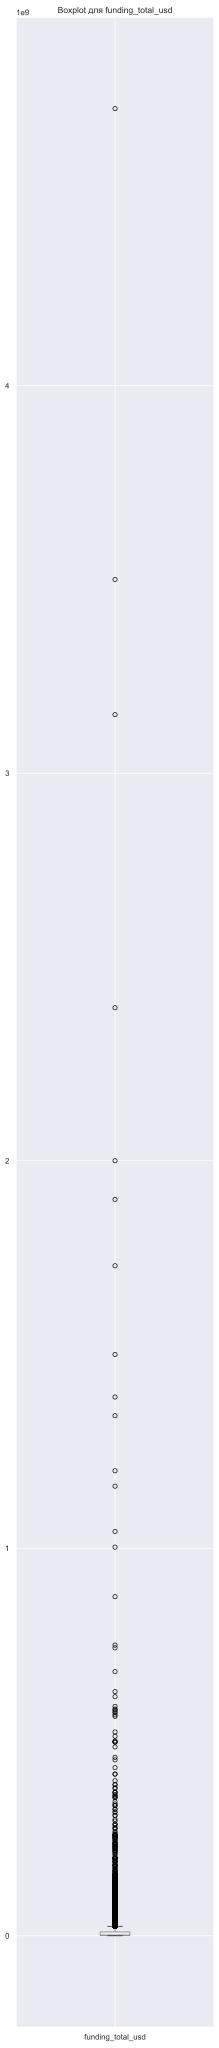

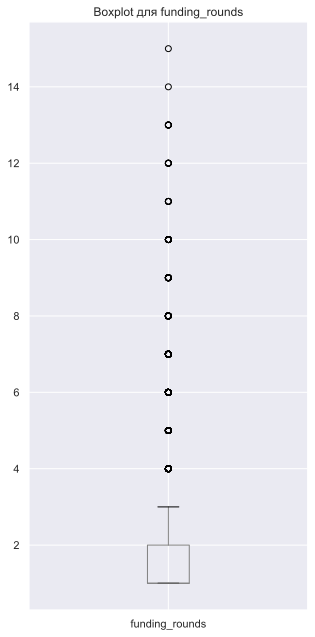

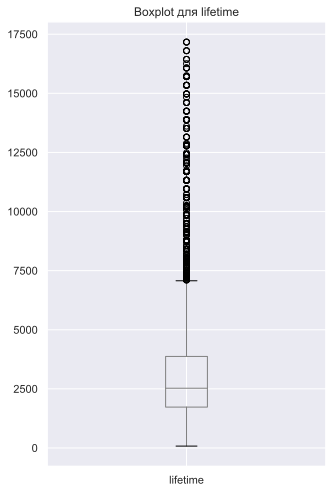

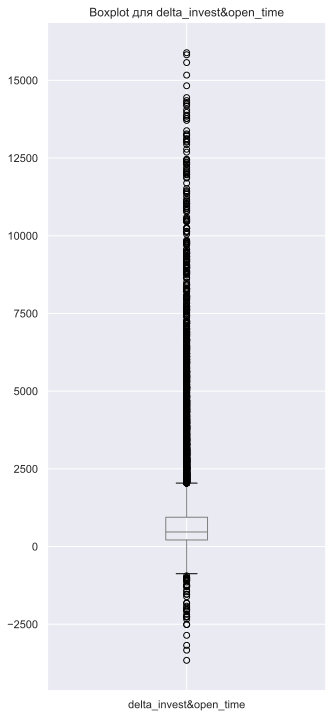

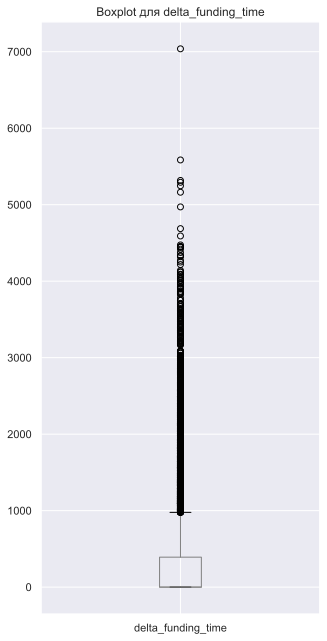

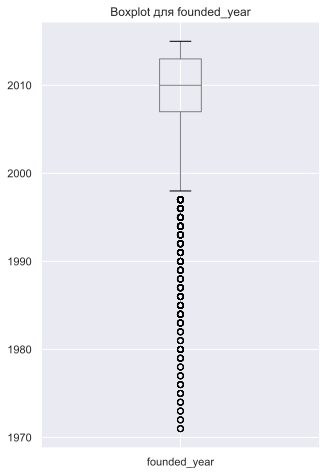

In [37]:
# Проверка на выбросы с помощью boxplot
for column in startup_test.select_dtypes(include=[np.number]).columns:
    if column != 'id':
        # Вычисление размаха данных
        data_range = startup_test[column].max() - startup_test[column].min()
        
        # Настройка размера графика в зависимости от размаха данных
        plt.figure(figsize=(5, data_range / startup_test[column].std()))
        startup_test.boxplot([column])
        plt.title(f'Boxplot для {column}')
        plt.show()

**Вывод по таблице startup_test:**
- привели стобцы с датой к типу Дата
- добавили 2 столбца: 
    - lifetime время жизни компании, если компания не закрылась то считается по дате выгрузки
    - delta_funding_time время между первой и последней инвестицией
    - delta_invest&open_time время между датой открытия компании и первой инвестицией
    - добавление столбца времени между последней инвестицией и датой открытия ухудшило предсказательную способность модели
    - state_code, region, city - удалим столбцы так как не влияют на предсказательную способность модели
- заполним пропуски в двух столбцах: new_category, funding_total_usd, country_code  - модой/медианой,  в пайплайне
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%. Мы используем модель XGBoost которая устойчива к выбросам, удаление выбросов никак не отразилось на предсказательную способность модели

**Вывод по предобработке данных** <a id='#2_3-bullet'></a>

Данные состоят из одного набора данных, разделенных на тренировочну и тестовую, тестовая не содержит целевого признака status

1. startup_train: содержит 52514 записей с 14 столбцами. Пропущенные значения имеются, в ходе обработки в пайплайне будут заменены на медианные значения. Добавили новый столбец lifetime, пропущенные значения в поле closed_at заменили на дату выгрузки для дальнейшего формирования столбца lifetime
2. startup_train: содержит 13125 записей с 13 столбцами. Пропущенные значения имеются, в ходе обработки в пайплайне будут заменены на медианные значения. 

Все наборы данных имеют столбец 'name', который будет являться идентификатором

- привели стобцы с датой к типу Дата
- добавили 2 столбца: lifetime и delta_funding_time
- заполним пропуски в двух столбцах: name, category_list, funding_total_usd, state_code, country_code, region, city - модой/медианой,  в пайплайне в дальнейшем
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%


### Шаг 3. Исследовательский анализ данных  <a id='#3_1-bullet'></a>

**Целью проекта является построение модели, которая сможет предсказать закроется стратап или нет. Построим графики зависимостей по критериям, которые могут выявить закономерности по оставшимся признакам**

In [38]:
# создаём списки с названиями признаков
ohe_col = ['name', 'new_category', 'country_code', 'state_code', 'region', 'city']
ord_col = ['funding_rounds']
num_col = ['delta_funding_time', 'funding_total_usd', 'lifetime', 'founded_year', 'delta_invest&open_time']

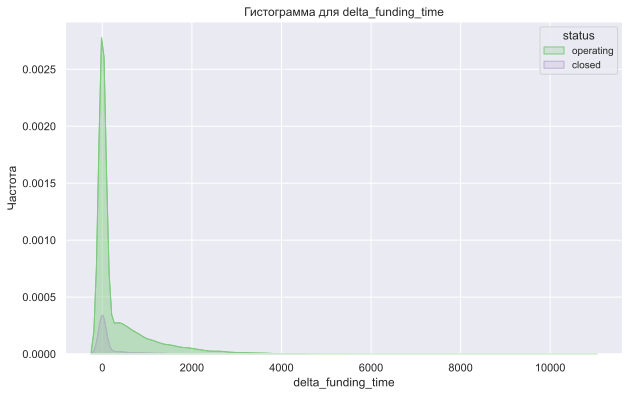

Таблица для delta_funding_time:

Категория: operating


count    mean     std   min   25%   50%     75%  \
delta_funding_time 47599.000 363.525 705.074 0.000 0.000 0.000 465.000   

                         max  
delta_funding_time 10807.000


Категория: closed


count    mean     std   min   25%   50%   75%      max
delta_funding_time 4915.000 181.558 471.257 0.000 0.000 0.000 0.000 4353.000

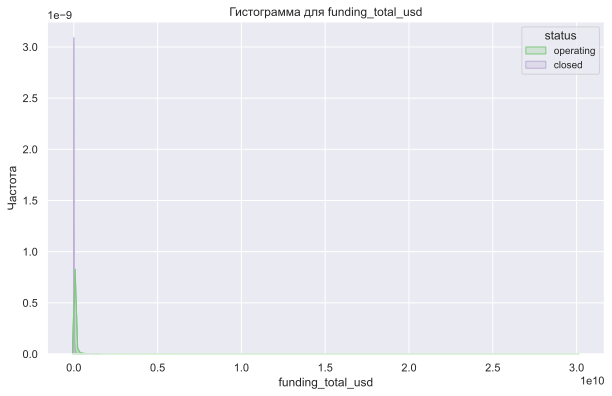

Таблица для funding_total_usd:

Категория: operating


count         mean           std   min        25%  \
funding_total_usd 38555.000 18950707.992 195757267.190 1.000 350203.000   

                          50%          75%             max  
funding_total_usd 2000000.000 10164006.500 30079503000.000


Категория: closed


count         mean          std   min        25%  \
funding_total_usd 3890.000 11286035.589 46818269.580 2.000 209461.837   

                          50%         75%            max  
funding_total_usd 1300000.000 7200000.000 1567504319.000

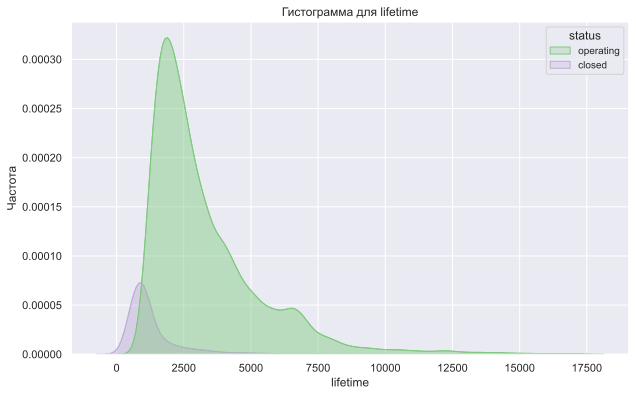

Таблица для lifetime:

Категория: operating


count     mean      std     min      25%      50%      75%  \
lifetime 47599.000 3320.973 2132.420 731.000 1826.000 2577.000 4018.000   

               max  
lifetime 17378.000


Категория: closed


count     mean      std    min     25%      50%      75%       max
lifetime 4915.000 1398.577 1380.385 17.000 735.000 1011.000 1410.000 16951.000

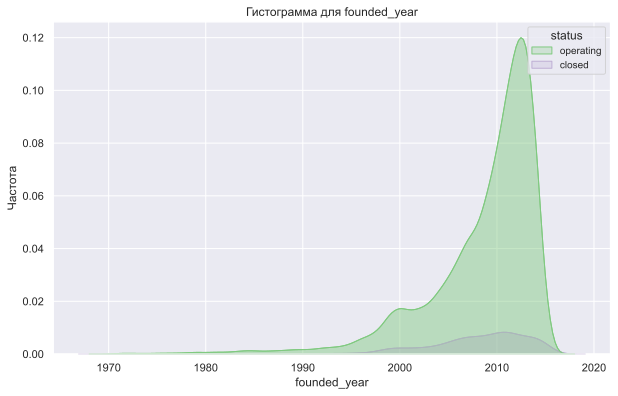

Таблица для founded_year:

Категория: operating


count     mean   std      min      25%      50%      75%  \
founded_year 47599.000 2008.630 5.763 1970.000 2007.000 2010.000 2013.000   

                  max  
founded_year 2016.000


Категория: closed


count     mean   std      min      25%      50%      75%  \
founded_year 4915.000 2007.886 5.641 1970.000 2005.000 2009.000 2012.000   

                  max  
founded_year 2016.000

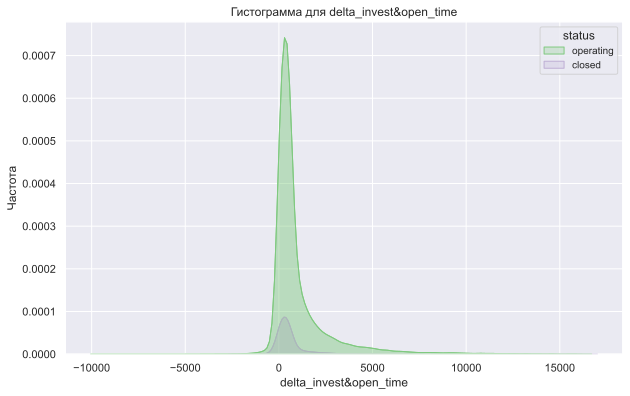

Таблица для delta_invest&open_time:

Категория: operating


count     mean      std       min     25%     50%  \
delta_invest&open_time 47599.000 1016.785 1681.579 -9465.000 222.000 491.000   

                            75%       max  
delta_invest&open_time 1034.000 16117.000


Категория: closed


count    mean      std       min     25%     50%  \
delta_invest&open_time 4915.000 675.550 1267.157 -2003.000 151.000 374.000   

                           75%       max  
delta_invest&open_time 639.000 16313.000

In [39]:
# Определение столбца и категорий для анализа
column = 'status'
categories = ['operating', 'closed']
#num_columns = startup_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Получение списка всех столбцов в датафрейме
columns = [col for col in num_col]

# Цикл по каждому столбцу для создания гистограммы и таблицы
for col in columns:
    plt.figure(figsize=(10, 6))
    # Цикл по каждой категории для создания гистограммы
    for category in categories:
        # Фильтрация данных по текущей категории
        data = startup_train[startup_train[column] == category]
        # Создание гистограммы для текущей категории
        sns.kdeplot(x=col, hue='status', data=startup_train, shade=True)
    
    # Настройка и отображение гистограммы
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    #plt.legend(loc='upper right')
    plt.show()
    
    # Вывод таблицы для каждого столбца
    print(f'Таблица для {col}:')
    for category in categories:
        # Фильтрация данных по текущей категории
        data = startup_train[startup_train[column] == category]
        print(f'\nКатегория: {category}')
        # Создание и вывод таблицы с описательной статистикой для текущей категории
        display(data[col].describe().to_frame().T)

Вывод:

1. Общее: выборка по целевому признаку не сбалансирована, доля открытых стартапов существенно больше. необходимо обратить внимание на это при анализе признаков методом shap и оценкой качества модели
2. столбец delta_funding_time: 
    - max время между инвестициями в открытых стартапах большем чем в закрытых в два раза
    - mean также больше в два раза
    - в обоих выборках стандартное отклоенение существенно, что говорит о наличии выбросов
3. столбец funding_total_usd распределение в открытых и закрытых стартапах идентично отличаются только значения, в открытых стартапах значения выше примерно в 2 раза
4. столбец lifetime можем наблюдать смещение среднего значения: в открытых стратапах mean выше в 2 раза по сравненнию с закрытыми, при этом максимальные значения примерно одинаковы.  std также высокое что говорит о наличие выбросов
5. столбец founded_year имеет схожее распределение в выборках:
    - max стартапов было открыто в 2016 году
    - min 1970
6. столбец elta_invest&open_time распределение значений между выборками похоже, имеются отрицательные значения что говорит о том что инвестиции привлекались до офиц открытия компании видимо в формате R&D 

Исходя из анализа графиков можно сделать вывод что отличия есть в столбце lifetime который может больше влиять на предсказательную способность модели.


In [40]:
column = 'status'
categories = ['operating', 'closed']

#ohe_columns = startup_train.select_dtypes(include=['object']).columns.tolist()

# Получение списка всех столбцов в датафрейме, исключая 'id'
columns = [col for col in ohe_col if col != 'name' and col != 'status']

# Цикл по каждому столбцу для создания гистограммы и таблицы

for col in columns:
    # Вывод таблицы для каждого столбца
    print(f'Таблица для {col}:')
    for category in categories:
        # Фильтрация данных по текущей категории
        data = startup_train[startup_train[column] == category]
        print(f'\nКатегория: {category}')
        # Создание и вывод таблицы с описательной статистикой для текущей категории
        display(data[col].describe().to_frame().T)

Таблица для new_category:

Категория: operating


count unique            top  freq
new_category  47599    698  Biotechnology  3385


Категория: closed


count unique  top freq
new_category  4915    400  nan  729

Таблица для country_code:

Категория: operating


count unique  top   freq
country_code  43383    131  USA  27418


Категория: closed


count unique  top  freq
country_code  3630     75  USA  2283

Таблица для state_code:

Категория: operating


count unique top  freq
state_code  42230    299  CA  9283


Категория: closed


count unique top freq
state_code  3522    186  CA  934

Таблица для region:

Категория: operating


count unique          top  freq
region  42607   1016  SF Bay Area  6332


Категория: closed


count unique          top freq
region  3549    439  SF Bay Area  636

Таблица для city:

Категория: operating


count unique            top  freq
city  42607   4323  San Francisco  2565


Категория: closed


count unique            top freq
city  3549    977  San Francisco  259

Вывод:

1. Столбец new_category. В открытых стартапах больше всего занимает доля категории Biotechnology, в закрытых категория отсутствует
2. столбец country_code: в обоих случая самая распространенная страна США
3. столбец state_code - Калифорния, что логично - это Кремниевая долина
4. столбец region - SF Bay Area Сан-Франциско столица Калифорнии
5. столбец city - San Francisco	

Итого: открытые и закрытые старапы больше всего открывались в Сан-Франциско, Калифорния, США. открытые старапы делали бизнес в отрасли Биотехнологий, закрытые стартапы не указывали категории бизнеса, возможно, по причине отсутствия целевой аудитории для продаж


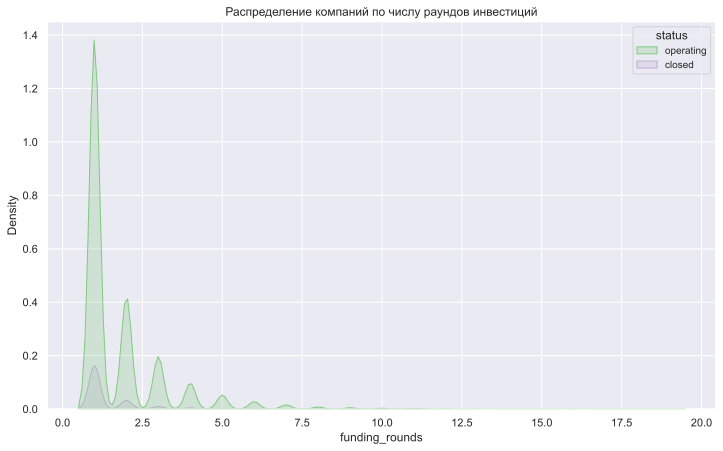

In [41]:
plt.figure(figsize=(12, 7))
plt.title('Распределение компаний по числу раундов инвестиций')
sns.kdeplot(data=startup_train, x='funding_rounds', hue="status", shade=True);

Вывод по графику:
- юольше всего компании заканчивали свое существование после первого раунда инвестиций
- доля компании где число раундов инвестиций больше 8 существенно мало
- отличий в распределении между открытми и закрытыми стартапами не наблюдается

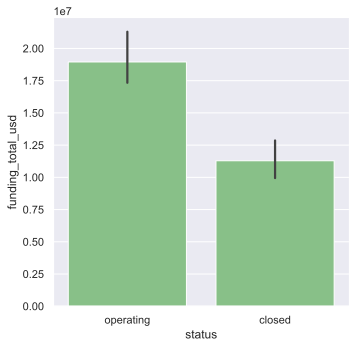

In [42]:
sns.catplot(x='status', y='funding_total_usd', data=startup_train, kind='bar');

Вывод по графику:
- открытые старатапы привлекают много инвестиций, но с учетом того что количество открытых стартапов больше видимо в истории были переоцененные стартапы с очень большим кол-вом инвестиций, с учетом того что максимальные значения в открытых стартапах больше, то кол-во закрытых стартапов с привлечением инвестиций больше 1 млрд больше. На графике чертой указан 95 перцентиль

In [86]:
startup_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

**Вывод:** <a id='#3_1-bullet'></a>

startup_train: 
- Этот набор данных содержит 52514 записей.
- выборка по целевому признаку не сбалансирована, доля открытых стартапов существенно больше. необходимо обратить внимание на это при анализе признаков методом shap и оценкой качества модели
- Исходя из анализа графиков можно сделать вывод что отличия есть в столбце lifetime который может больше влиять на предсказательную способность модели.
- открытые и закрытые старапы больше всего открывались в Сан-Франциско, Калифорния, США. открытые старапы делали бизнес в отрасли Биотехнологий, закрытые стартапы не указывали категории бизнеса, возможно, по причине отсутствия целевой аудитории для продаж
- юольше всего компании заканчивали свое существование после первого раунда инвестиций
- доля компании где число раундов инвестиций больше 8 существенно мало
- открытые старатапы привлекают много инвестиций, но с учетом того что количество открытых стартапов больше видимо в истории были переоцененные стартапы с очень большим кол-вом инвестиций, с учетом того что максимальные значения в открытых стартапах больше, то кол-во закрытых стартапов с привлечением инвестиций больше 1 млрд больше.


**Проведем исследовательский анализ для тестовой выборки**

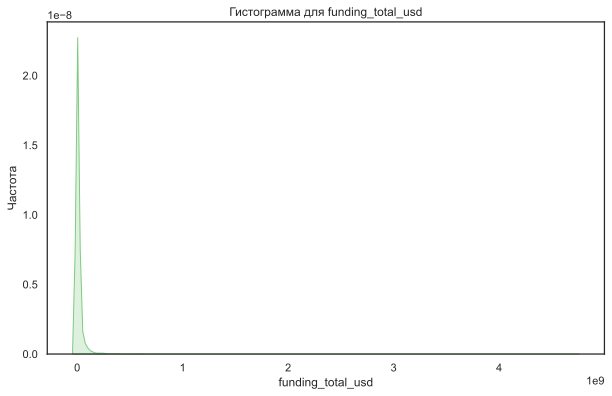

Таблица для funding_total_usd:


count         mean          std   min        25%  \
funding_total_usd 3890.000 11286035.589 46818269.580 2.000 209461.837   

                          50%         75%            max  
funding_total_usd 1300000.000 7200000.000 1567504319.000

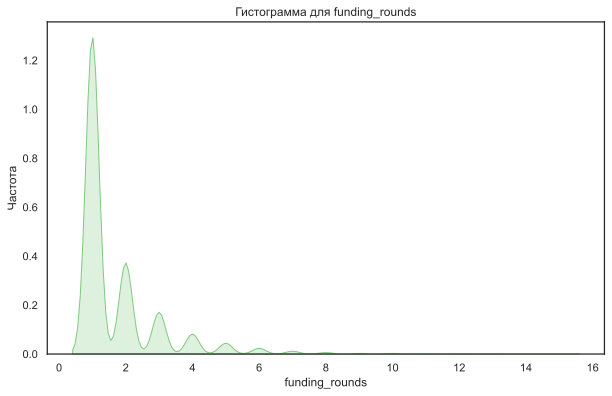

Таблица для funding_rounds:


count  mean   std   min   25%   50%   75%    max
funding_rounds 4915.000 1.404 0.962 1.000 1.000 1.000 1.000 11.000

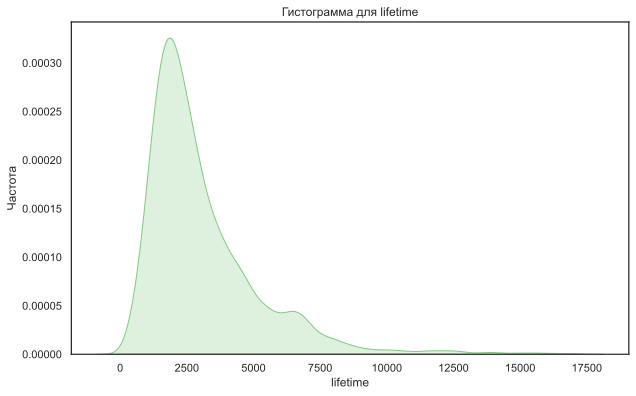

Таблица для lifetime:


count     mean      std    min     25%      50%      75%       max
lifetime 4915.000 1398.577 1380.385 17.000 735.000 1011.000 1410.000 16951.000

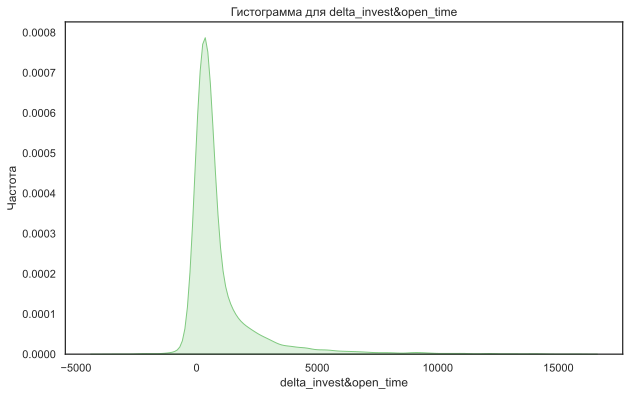

Таблица для delta_invest&open_time:


count    mean      std       min     25%     50%  \
delta_invest&open_time 4915.000 675.550 1267.157 -2003.000 151.000 374.000   

                           75%       max  
delta_invest&open_time 639.000 16313.000

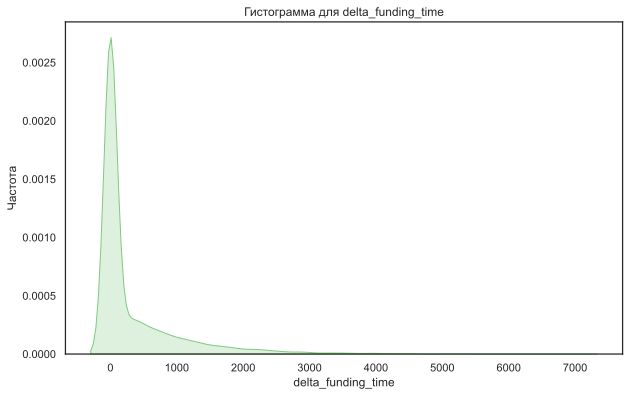

Таблица для delta_funding_time:


count    mean     std   min   25%   50%   75%      max
delta_funding_time 4915.000 181.558 471.257 0.000 0.000 0.000 0.000 4353.000

In [87]:
# Получение списка всех столбцов в датафрейме
columns = [col for col in num_columns]

# Цикл по каждому столбцу для создания гистограммы и таблицы
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=col, data=startup_test, shade=True)
    
    # Настройка и отображение гистограммы
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()
    # Вывод таблицы для каждого столбца    print(f'Таблица для {col}:')
    
    print(f'Таблица для {col}:')
    # Создание и вывод таблицы с описательной статистикой для текущей категории
    display(data[col].describe().to_frame().T)

**Вывод**

- Данные распределены нормально. Инсайтов помимо тренировочной выборки не выявлено. 
- графики и статистики соответствую в среднем тренировочной выборке, что говорит об идентичности семантики данных

 ### Шаг 4. Подготовка данных<a id='#4_1-bullet'></a>

In [51]:
#Удалим столбцы которые не улучшают или ухудшают предсказательную способность модели
train = startup_train.drop(['closed_at', 'founded_at', 'first_funding_at', 'last_funding_at', 'category_list', 'state_code', 'region', 'city'], axis=1)
test = startup_test.drop(['first_funding_at', 'last_funding_at', 'founded_at', 'category_list', 'state_code', 'region', 'city'], axis=1)
train.drop_duplicates(inplace=True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    52513 non-null  object 
 1   funding_total_usd       42445 non-null  float64
 2   status                  52514 non-null  object 
 3   country_code            47013 non-null  object 
 4   funding_rounds          52514 non-null  int64  
 5   lifetime                52514 non-null  int64  
 6   delta_invest&open_time  52514 non-null  int64  
 7   delta_funding_time      52514 non-null  int64  
 8   founded_year            52514 non-null  int32  
 9   new_category            52514 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------           

In [52]:
# загружаем данные
X_train = train.drop('status', axis=1)
X_test = test

y_train = train['status']

In [53]:
# создадим экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучим модель и трансформируем тренировочную выборку 
y_train = label_encoder.fit_transform(y_train)


### Шаг 5. Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

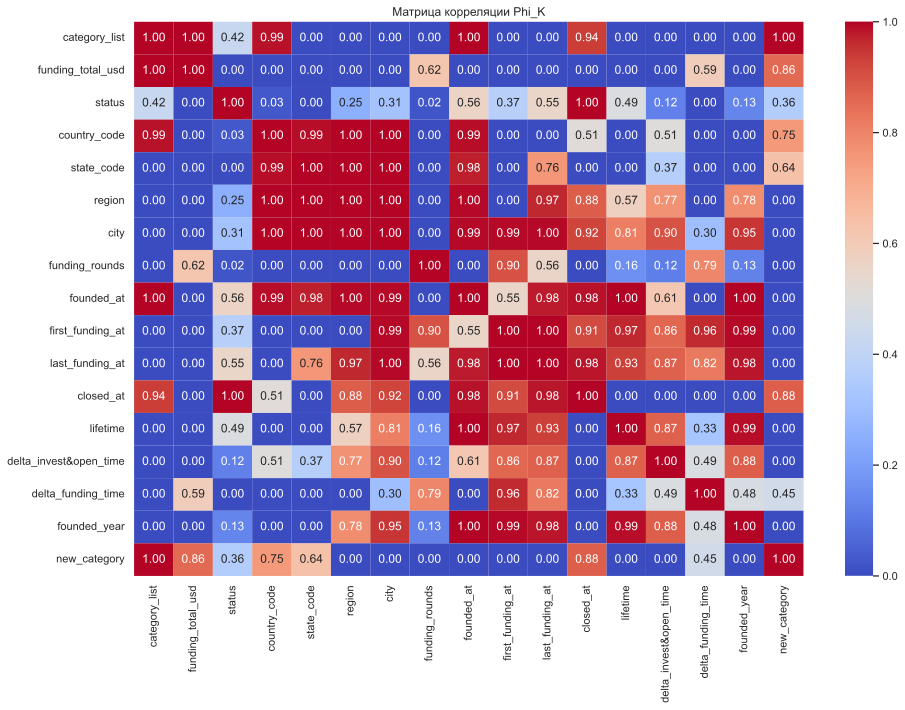

In [54]:
# Удаление столбца 'name'
data_without_id = startup_train.drop('name', axis=1)

# создаём список с наименованиями непрерывных признаков
interval_cols = ['funding_total_usd', 'lifetime', 'delta_invest&open_time', 'delta_funding_time']

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = data_without_id.sample(1000).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

**Вывод:**

столбцы с высокой корреляцией (>0.9) возможно мультиколлинеарны  

- с целевым признаком статус сильную корреляцию имеют поля: closed_at - данное поле перед обучением будет удалено - так как признаки коллинеарны. Признаки которые имеют высокую корреляцию: founded_at, last_funding_at и lifetime; средняя корреляция: category_list/new_category, region, city, first_funding_at
- country_code корредирует сильно со столбцами state_code, region, city. Оствим агрегирующий признак, остальные не вносят сущ влияния в предсказат способность модели и хотелось бы уменьшить кол-во категорий для снижения разреженности матрицы признаков посде кодирования.
- category_list коррелирует с funding_total_usd, что любопытно, думаю можно сделать вывод что в зависимости от категории есть закономерности по объему инвестиций. также коррелирует с country_code, что тоже может являться инсайтом, в зависимости от страны есть предпочтения в инвестиции в некоторые категории. есть сильная корреляция с close_at скорее всего изза того что наиболее популярные категории стартапов еще существуют а это поле мы заполняли датой выгрузки. Сильная корреляция с new_category что логично ведь признак получен из исходного
- funding_total_usd из дополнительного можем подтвердить сильную корреляцию с new_category. есть корреляция с funding_rounds и delta_funding_time  что любопытно видимо есть взаимосвязь между раундами и объемами инвестиций и они не всегда зависят от конкретного стартапа а имеют коррелирующие коэффициенты на основании которых инвесторы принимают решения сколько вкладывать в то или иное время
- first_funding_at и last_funding_at коллинеарны с founded_at, city, lifetime, closed_at, delta_funding_time, founded_year. будем удалять эти столбцы так как из них сгенерированы синтетические признаки
- closed_at будем удалять так как этот признак коллинеарен с целевым признаком
- lifetime коллинеарен с founded_at, который будем удалять

In [90]:
startup_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    52513 non-null  object        
 1   category_list           50049 non-null  object        
 2   funding_total_usd       42445 non-null  float64       
 3   status                  52514 non-null  object        
 4   country_code            47013 non-null  object        
 5   state_code              45752 non-null  object        
 6   region                  46156 non-null  object        
 7   city                    46156 non-null  object        
 8   funding_rounds          52514 non-null  int64         
 9   founded_at              52514 non-null  datetime64[ns]
 10  first_funding_at        52514 non-null  datetime64[ns]
 11  last_funding_at         52514 non-null  datetime64[ns]
 12  closed_at               52514 non-null  dateti

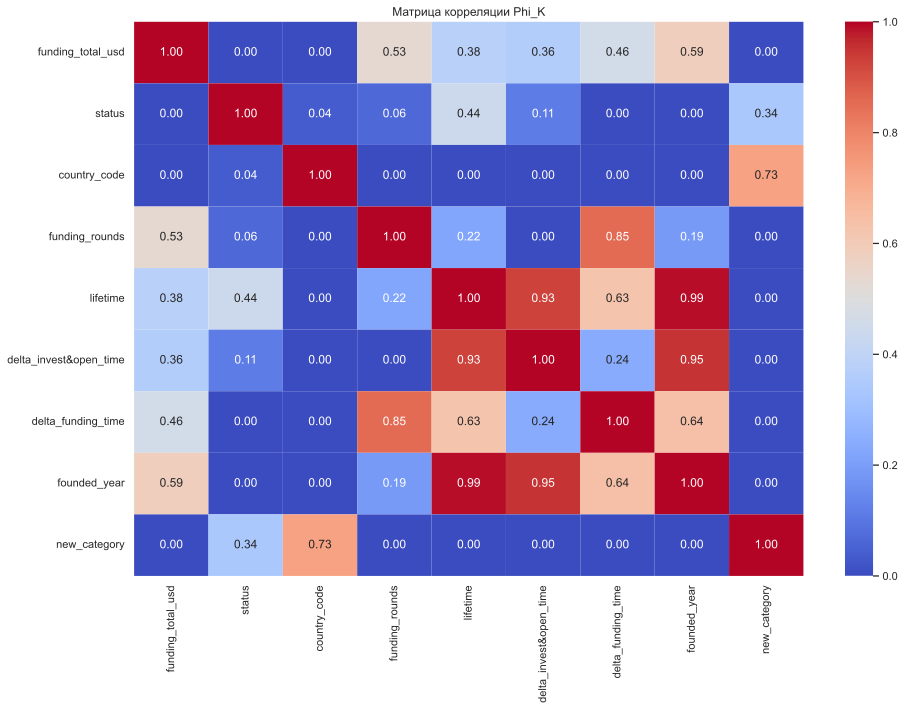

In [89]:
# Удаление столбца 'name'
data_without_full = startup_train.drop(['name', 'category_list', 'state_code', 'region', 'city', 'founded_at',  'first_funding_at', 'last_funding_at', 'closed_at'], axis=1)

# создаём список с наименованиями непрерывных признаков
interval_cols = ['funding_total_usd', 'lifetime', 'delta_invest&open_time', 'delta_funding_time']

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = data_without_full.sample(1000).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

Вывод:

после удаления столбцов с мультиколлинеарностью можно сделать следующие выводы:
- Сильная корреляция: категория и lifetime
- слабая корреляция: country_code, funding_rounds, delta_invest&open_time

### Шаг 5.  Обучение моделей  <a id='#5_1-bullet'></a>

#### Поиск гиперпараметров моделей с помощью GridSearchCV

In [55]:
# pipe_final = Pipeline([
#     ('preprocessor', data_preprocessor),
#     ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
# ])
 
# param_grid = [
#     {
#         'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
#     },

#     {
#         'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
#         'models__max_depth': range(1, 25),
#         'models__max_features': range(1, 25),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
#     },
#     {
#         'models': [KNeighborsClassifier()],
#         'models__n_neighbors': range(10, 20),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
#     }
# ]

# grid = GridSearchCV(
#     pipe_final,
#     param_grid,
#     #n_jobs=-1,
#     cv=5,
#     scoring='f1'
# )
# grid.fit(X_train, y_train)


In [56]:
# best_model = grid.best_estimator_
# print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
# print(f'Метрика F1 лучшей модели по кросс-валидации на обучающих данных: {round(grid.best_score_,4)}')

In [57]:
# test_final = test.drop(['category_list', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'lifetime', 'delta_funding_time'], axis=1)
# prediction_final = best_model.predict(X_test)
# y_test_df = pd.DataFrame(label_encoder.inverse_transform(prediction_final), columns = ['status'])
# test_final = pd.concat([test_final,y_test_df],axis=1).
# print(test_final.head())
# test_final.to_csv('startup_predict.csv', index=False)

**Вывод по обучению первой модели**
- Обучили методом RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier
- параметры лучшей модели 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8
- метрика лучшей модели на кроссвалидационной выборке - Best score: 80%. При проверке на тестовой выборки метрика составила 71,33 
Минимальный порог был преодолен, но решила улучшить показатель попробова новые модели

#### Pipelines+Optuna+CatBoostClassifier <a id='#5_2-bullet'></a>

In [58]:
# создаём списки с названиями признаков , 'state_code', 'region', 'city'
ohe_col = ['name', 'new_category', 'country_code']
ord_col = ['funding_rounds']
num_col = ['delta_funding_time', 'funding_total_usd', 'lifetime', 'delta_invest&open_time', 'founded_year']

In [59]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('one-hot',OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', min_frequency=500, sparse_output=False))
])

ord_pipeline = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['1', '2', '3', '4',  '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='median'))
    ]
)

In [60]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_col),
    ('ord', ord_pipeline, ord_col),
    ('ohe_pipeline',ohe_pipeline, ohe_col)
    ],
    remainder='drop',
    n_jobs=-1)

In [61]:
# #Создадим функцию для поиска гиперпараметров для модели CatBoostClassifier с помощью Optuna
# def objective_cbc(trial):    
#     # Список гиперпараметров для перебора (для CatBoostClassifier)
#     param = {
#         "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
#         "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
#         "depth": trial.suggest_int("depth", 1, 12),
#         "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
#         "bootstrap_type": trial.suggest_categorical(
#             "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
#         ),
#         "used_ram_limit": "3gb",
#     }
    

#     if param["bootstrap_type"] == "Bayesian":
#         param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#     elif param["bootstrap_type"] == "Bernoulli":
#         param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    
#     # Определяю модель машинного обучения, которой передаются гиперпараметры , cat_features = cat_features
#     estimator = CatBoostClassifier(**param, verbose = False)

#     # Прикручиваю пайплайны
#     clf_pipeline_cbc = Pipeline(steps=[
#             ('col_trans', col_trans),
#             ('model', estimator)
#         ])
        
#     f1_cbc = cross_val_score(clf_pipeline_cbc, X_train, y_train, cv=3, scoring= 'f1').mean()
#     return f1_cbc

# # Инициализирую подбора гиперпараметров.
# study_cbc = optuna.create_study(direction="maximize", study_name="lpopf")
# # Запускаю процесс подбора гиперпараметров
# study_cbc.optimize(objective_cbc, n_trials=100)



In [62]:
# #Выводим результаты поиска лучших гиперпараметров
# print('Number of finished trials: {}'.format(len(study_cbc.trials)))
# print('Best trial:')
# trial_cbc = study_cbc.best_trial

# print('  Value: {}'.format(trial_cbc.value))
# print('  Params: ')

# for key, value in trial_cbc.params.items():
#     print('    {}: {}'.format(key, value))

In [63]:
# #Сохраним лучшие параметры модели в переменную
# params_cbc = trial_cbc.params

In [64]:
# #Визуализируем параметры которые больше всего повлияли на метрику
# optuna.visualization.plot_param_importances(study_cbc)

In [65]:
# #Переобучим модеь с лучшими параметрами через пайплайн
# clf = CatBoostClassifier(**params_cbc, verbose = False)
# clf_pipeline_best = Pipeline(steps=[
#     ('col_trans', col_trans),
#     ('model', clf)
# ])
# clf_pipeline_best.fit(X_train, y_train)
# predictions_test = clf_pipeline_best.predict(X_test)
# display(clf_pipeline_best)


In [66]:
# #Сохраним результаты предсказания в файл для загрузки на платформу Kaggle
# test_final = test.drop(['new_category', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'lifetime', 'delta_funding_time', 'delta_invest&open_time', 'founded_year'], axis=1)
# y_test_cbc = pd.DataFrame(label_encoder.inverse_transform(predictions_test), columns = ['status'])
# test_final_cbc = pd.concat([test_final,y_test_cbc],axis=1)
# print(test_final_cbc.head())
# test_final_cbc.to_csv('startup_predict_cbc.csv', index=False)

**Вывод по обучению второй модели**

- Поиск гиперпараметров осуществлялся через Optuna: получилось быстрее чем GridSearchCV примерно в 3 раза
- Лучшие гиперпараметры:   
    - objective: Logloss
    - colsample_bylevel: 0.09591100617611274
    - depth: 10
    - boosting_type: Ordered
    - bootstrap_type: Bayesian
    - bagging_temperature: 0.18463486382307404
- Лучша метрика 0.9973492024486962
- Результат работы модели на тестовой выборке 0.97333

#### Pipelines+Optuna+XGBoostClassifier <a id='#5_3-bullet'></a>

In [67]:
def objective_xgbst(trial):    
    # Список гиперпараметров для перебора (для XGBoostClassifier)
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Определяю модель машинного обучения, которой передаются гиперпараметры
    estimator = XGBClassifier(**param, verbose=False)

    # Прикручиваю пайплайны
    clf_pipeline = Pipeline(steps=[
            ('col_trans', col_trans),
            ('model', estimator)
        ])
        
    f1_xgbst = cross_val_score(clf_pipeline, X_train, y_train, cv=3, scoring= 'f1').mean()
    return f1_xgbst

# Инициализирую подбор гиперпараметров.
study_xgbst = optuna.create_study(direction="maximize", study_name="lpopf_xgbst")
# Запускаю процесс подбора гиперпараметров
study_xgbst.optimize(objective_xgbst, n_trials=100)

[I 2024-06-16 21:13:30,492] A new study created in memory with name: lpopf_xgbst
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2024-06-16 21:13:33,321] Trial 0 finished with value: 0.9779252795679098 and parameters: {'max_depth': 5, 'learning_rate': 0.2346505182315014, 'n_estimators': 287, 'min_child_

In [68]:
print('Number of finished trials: {}'.format(len(study_xgbst.trials)))
print('Best trial:')
trial_xgbst = study_xgbst.best_trial

print('  Value: {}'.format(trial_xgbst.value))
print('  Params: ')

for key, value in trial_xgbst.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9989400552877595
  Params: 
    max_depth: 4
    learning_rate: 0.22715366939883047
    n_estimators: 129
    min_child_weight: 1
    gamma: 0.19300530805292987
    subsample: 0.79364822333228
    colsample_bytree: 0.9063799805814188
    reg_alpha: 0.0004251560634426982
    reg_lambda: 1.581239571894789e-07


In [69]:
params_xgbst = trial_xgbst.params

In [70]:
optuna.visualization.plot_param_importances(study_xgbst)

In [71]:
xgbst = XGBClassifier(**params_xgbst)
clf_pipeline_xgbst = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', xgbst)
])
clf_pipeline_xgbst.fit(X_train, y_train)
predictions_test_xgbst = clf_pipeline_xgbst.predict(X_test)
display(clf_pipeline_xgbst)

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['delta_funding_time',
                                                   'funding_total_usd',
                                                   'lifetime',
                                                   'delta_invest&open_time',
                                                   'founded_year']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.22715366939883047, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=129, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [72]:
#'state_code', 'region', 'city', 
test_final = test.drop(['new_category', 'funding_total_usd', 'country_code', 'funding_rounds', 'lifetime', 'delta_funding_time', 'delta_invest&open_time', 'founded_year'], axis=1)
y_test_xgbst = pd.DataFrame(label_encoder.inverse_transform(predictions_test_xgbst), columns = ['status'])
test_final_xgbst = pd.concat([test_final,y_test_xgbst],axis=1)
print(test_final_xgbst.head())
test_final_xgbst.to_csv('startup_predict_xgbst.csv', index=False)

                     name     status
0              Crystalsol  operating
1        JBI Fish & Wings  operating
2                COINPLUS  operating
3  Imagine Communications  operating
4                   DNA13  operating


**Вывод по обучению третьей модели**
- Обучили методом XGBClassifier
- параметры лучшей модели  
    - max_depth: 7
    - learning_rate: 0.09094652315760234
    - n_estimators: 442
    - min_child_weight: 1
    - gamma: 1.09492351340554e-06
    - subsample: 0.8912327445178739
    - colsample_bytree: 0.999161050290411
    - reg_alpha: 7.728759556409921e-06
    - reg_lambda: 0.00019927479774781205
- метрика лучшей модели на кроссвалидационной выборке -0.9990344050094103. 
- метрика на тестовой выборке - 0.99099

In [103]:
feature_names = clf_pipeline_xgbst[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    clf_pipeline_xgbst[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
mdi_importances

num_pipeline__lifetime                           0.457
num_pipeline__founded_year                       0.224
ohe_pipeline__new_category_nan                   0.096
num_pipeline__delta_invest&open_time             0.059
num_pipeline__delta_funding_time                 0.034
ohe_pipeline__country_code_USA                   0.021
ohe_pipeline__new_category_Clean Technology      0.015
ord__funding_rounds                              0.014
ohe_pipeline__new_category_Health Care           0.013
ohe_pipeline__new_category_Apps                  0.011
num_pipeline__funding_total_usd                  0.010
ohe_pipeline__new_category_Biotechnology         0.009
ohe_pipeline__new_category_Analytics             0.008
ohe_pipeline__country_code_GBR                   0.007
ohe_pipeline__new_category_infrequent_sklearn    0.007
ohe_pipeline__country_code_CHN                   0.007
ohe_pipeline__country_code_infrequent_sklearn    0.005
ohe_pipeline__country_code_IND                   0.005
ohe_pipeli

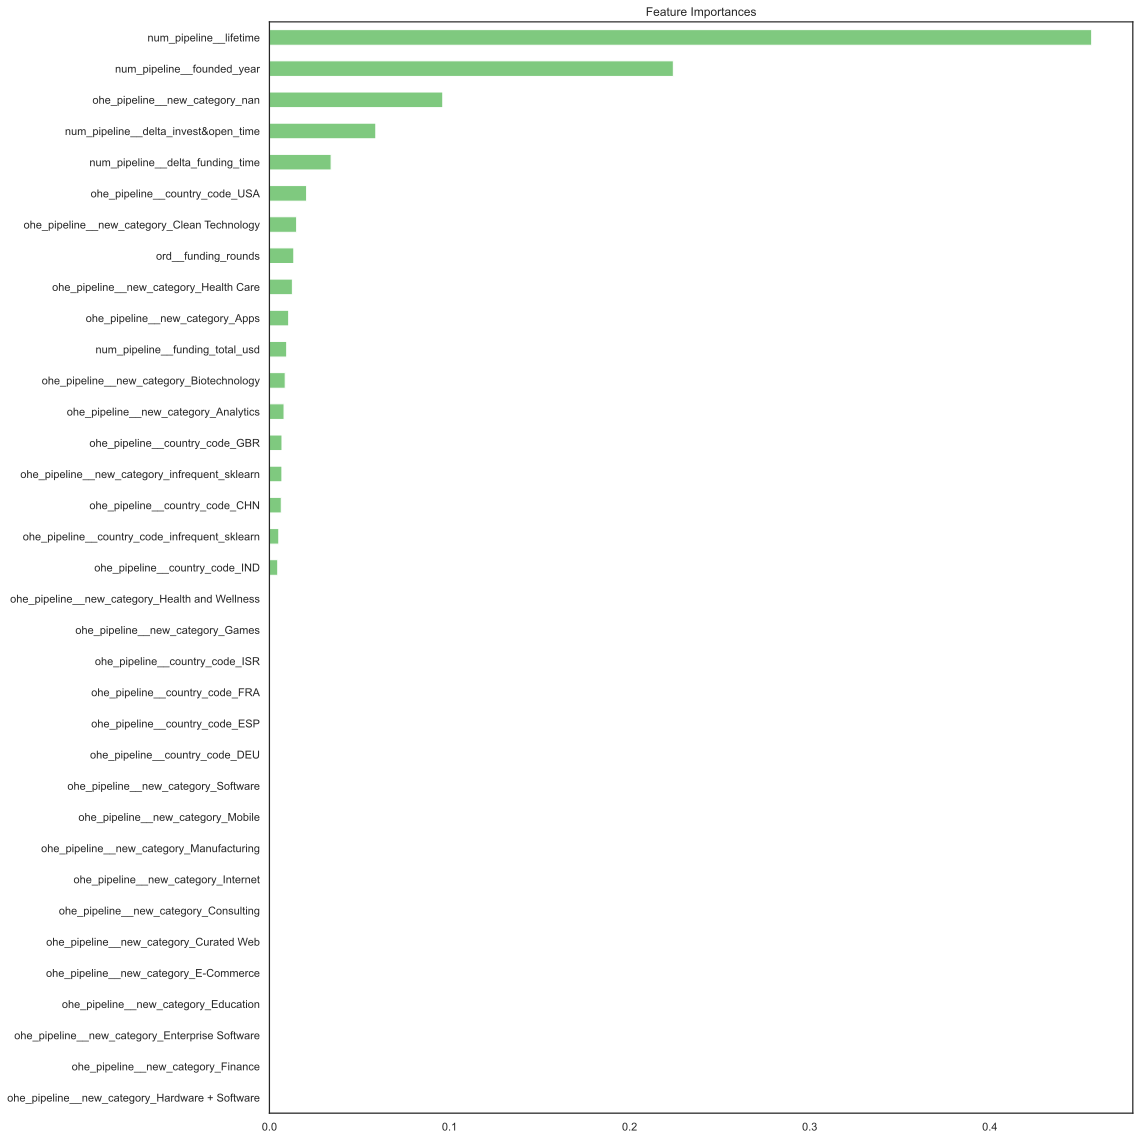

In [101]:
ax = mdi_importances.plot.barh()
ax.set_title("Feature Importances")
ax.figure.tight_layout()

Вывод по оценке важности признаков:

Категории, которым модель присвоила самые высокие веса:

num_pipeline__lifetime                           0.457
num_pipeline__founded_year                       0.224
ohe_pipeline__new_category_nan                   0.096
num_pipeline__delta_invest&open_time             0.059
num_pipeline__delta_funding_time                 0.034
ohe_pipeline__country_code_USA                   0.021
ohe_pipeline__new_category_Clean Technology      0.015
ord__funding_rounds                              0.014
ohe_pipeline__new_category_Health Care           0.013
ohe_pipeline__new_category_Apps                  0.011
num_pipeline__funding_total_usd                  0.010
ohe_pipeline__new_category_Biotechnology         0.009
ohe_pipeline__new_category_Analytics             0.008
ohe_pipeline__country_code_GBR                   0.007
ohe_pipeline__new_category_infrequent_sklearn    0.007
ohe_pipeline__country_code_CHN                   0.007
ohe_pipeline__country_code_infrequent_sklearn    0.005
ohe_pipeline__country_code_IND                   0.005

#### Оценка важности признаков методом SHAP

In [73]:

X_train_p = pd.DataFrame(
    col_trans.fit_transform(X_train),
    columns=col_trans.get_feature_names_out())
print(X_train_p)

X_test_p = pd.DataFrame(
    col_trans.transform(X_test),
    columns=col_trans.get_feature_names_out()    
) 

       num_pipeline__delta_funding_time  num_pipeline__funding_total_usd  \
0                                 1.399                           -0.085   
1                                 1.520                            0.165   
2                                 0.486                            0.121   
3                                 1.023                            0.042   
4                                -0.503                           -0.078   
...                                 ...                              ...   
52509                            -0.503                           -0.078   
52510                            -0.503                           -0.087   
52511                             0.319                           -0.090   
52512                             2.282                           -0.013   
52513                            -0.503                           -0.088   

       num_pipeline__lifetime  num_pipeline__delta_invest&open_time  \
0               

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [74]:
# Функция для выбора k лучших признаков
def select_k_best(X_train_p, y_train, params_xgbst):
    f1_list = []
    max_f1 = 0
    for i in range(len(X_test_p.columns)):
        selector = SelectKBest(mutual_info_classif, k=i+1)
        selector.fit(X_train_p, y_train)
        
        features_names = selector.get_feature_names_out()
        
        X_train_new = X_train_p[list(features_names)]
        X_test_new = X_test_p[list(features_names)]
        model = XGBClassifier(**params_xgbst)
        model.fit(X_train_new, y_train)

        #Метрика на первой модели
        prediction_kbest = model.predict(X_train_new)
        # вычисляем метрику
        f1_kbest = f1_score(y_train, prediction_kbest)
        f1_list.append(f1_kbest)
    
    
        print(i, trial_xgbst.value, f1_kbest)
        if f1_kbest > max_f1:
            max_f1 = f1_kbest
    
    print("Самая высокая метрика f1_kbest:", i, trial_xgbst.value,  max_f1)

# Вызов функции
select_k_best(X_train_p, y_train, params_xgbst)

    

0 0.9989400552877595 0.9719933081355722
1 0.9989400552877595 0.9722374221790887
2 0.9989400552877595 0.9726509668693668
3 0.9989400552877595 0.9743245337603967
4 0.9989400552877595 0.9987828167299742
5 0.9989400552877595 0.9988351226269558
6 0.9989400552877595 0.998856207435701
7 0.9989400552877595 0.9997899556806487
8 0.9989400552877595 0.9998004558009599
9 0.9989400552877595 0.9997689561016593
10 0.9989400552877595 0.9997689561016593
11 0.9989400552877595 0.9997059626572574
12 0.9989400552877595 0.9997479574048014
13 0.9989400552877595 0.9997479574048014
14 0.9989400552877595 0.9998214567032505
15 0.9989400552877595 0.9997794557808841
16 0.9989400552877595 0.9998004558009599
17 0.9989400552877595 0.9998004558009599
18 0.9989400552877595 0.9997794557808841
19 0.9989400552877595 0.9997689561016593
20 0.9989400552877595 0.9997479574048014
21 0.9989400552877595 0.9997899556806487
22 0.9989400552877595 0.9997794557808841
23 0.9989400552877595 0.9998004558009599
24 0.9989400552877595 0.999

In [92]:
#Посмотрим какие признаки необходимо нам оставить:
selector = SelectKBest(mutual_info_classif, k=34)
selector.fit(X_train_p, y_train)
features_names = selector.get_feature_names_out()
print(features_names) 

['num_pipeline__delta_funding_time' 'num_pipeline__funding_total_usd'
 'num_pipeline__lifetime' 'num_pipeline__delta_invest&open_time'
 'num_pipeline__founded_year' 'ord__funding_rounds'
 'ohe_pipeline__new_category_Apps'
 'ohe_pipeline__new_category_Biotechnology'
 'ohe_pipeline__new_category_Clean Technology'
 'ohe_pipeline__new_category_Consulting'
 'ohe_pipeline__new_category_Curated Web'
 'ohe_pipeline__new_category_E-Commerce'
 'ohe_pipeline__new_category_Education'
 'ohe_pipeline__new_category_Enterprise Software'
 'ohe_pipeline__new_category_Finance' 'ohe_pipeline__new_category_Games'
 'ohe_pipeline__new_category_Hardware + Software'
 'ohe_pipeline__new_category_Health Care'
 'ohe_pipeline__new_category_Health and Wellness'
 'ohe_pipeline__new_category_Internet'
 'ohe_pipeline__new_category_Manufacturing'
 'ohe_pipeline__new_category_Mobile' 'ohe_pipeline__new_category_Software'
 'ohe_pipeline__new_category_nan'
 'ohe_pipeline__new_category_infrequent_sklearn'
 'ohe_pipeline__c

In [93]:
# сформируем выборки с лучшими признаками
features_names = X_train_p.columns[selector.get_support(indices=True)]
X_train_new = X_train_p[list(features_names)]
X_test_new = X_test_p[list(features_names)]



In [94]:
# обучите модель на лучших признаках
xgbst_shap = XGBClassifier(**params_xgbst)
xgbst_shap.fit(X_train_new, y_train)
print(list(features_names))

['num_pipeline__delta_funding_time', 'num_pipeline__funding_total_usd', 'num_pipeline__lifetime', 'num_pipeline__delta_invest&open_time', 'num_pipeline__founded_year', 'ord__funding_rounds', 'ohe_pipeline__new_category_Apps', 'ohe_pipeline__new_category_Biotechnology', 'ohe_pipeline__new_category_Clean Technology', 'ohe_pipeline__new_category_Consulting', 'ohe_pipeline__new_category_Curated Web', 'ohe_pipeline__new_category_E-Commerce', 'ohe_pipeline__new_category_Education', 'ohe_pipeline__new_category_Enterprise Software', 'ohe_pipeline__new_category_Finance', 'ohe_pipeline__new_category_Games', 'ohe_pipeline__new_category_Hardware + Software', 'ohe_pipeline__new_category_Health Care', 'ohe_pipeline__new_category_Health and Wellness', 'ohe_pipeline__new_category_Internet', 'ohe_pipeline__new_category_Manufacturing', 'ohe_pipeline__new_category_Mobile', 'ohe_pipeline__new_category_Software', 'ohe_pipeline__new_category_nan', 'ohe_pipeline__new_category_infrequent_sklearn', 'ohe_pipeli

<AxesSubplot: ylabel='Feature'>

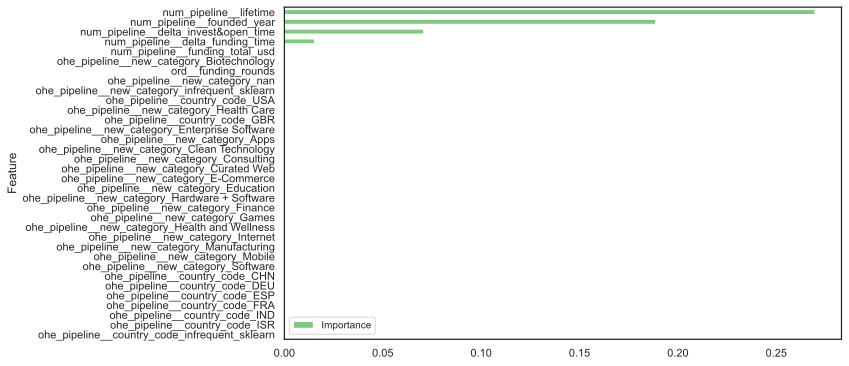

In [95]:

def custom_f1(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

result = permutation_importance(xgbst_shap, X_train_new, y_train, scoring=custom_f1)

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

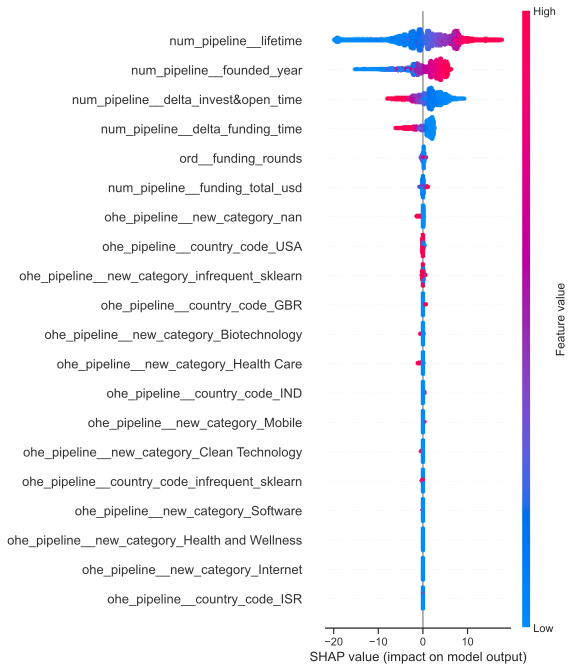

In [96]:
# построим график общей значимости признаков:
explainer = shap.TreeExplainer(xgbst_shap)
# Используем встроенную функцию объяснения SHAP для получения SHAP-значений
shap_values = explainer.shap_values(X_train_new)
shap.summary_plot(shap_values, X_train_new) 

**Вывод по визуализации вклада признаков в каждое предсказание модели**

На графике точками отображены все наблюдения из выборки. На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений.

Негативные значения Шепли слева от центральной вертикальной линии означают, что признак склоняет модель отнести объекты к классу 0 (стратап закроется), а положительные справа — к классу 1 (стартап со статус открыт).

Чем толще линия по вертикали, тем больше наблюдений сгруппированы вместе: у них близкие значения Шепли. Это значит, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных.

Цвет точки отражает значения каждого признака объекта: чем краснее объект, тем больше признак, указанный на оси Y.

**Признаки, влияющие на статус стартапа:**

все признаки имеют значение для предсказания статуса стартапа. Признаки с большими положительными значениями SHAP сильнее всего влияют на то что стартап будет открыт, а признаки с отрицательными значениями SHAP - на то что стартап будет закрыт

Признаки lifetime, founded_year,delta_invest&open_time, delta_funding_time являются наиболее значимыми, так как они имеют наибольшее влияние на статус.

funding_total_usd, country_code USA, new_category_nan  - менее важны для модели.

In [97]:
predictions_test_xgbst_kbest = xgbst_shap.predict(X_test_new)
display(xgbst_shap)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9063799805814188, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.19300530805292987,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22715366939883047,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=129, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
test_final_kbest = test.drop(['new_category', 'funding_total_usd', 'country_code', 'funding_rounds', 'lifetime', 'delta_funding_time', 'delta_invest&open_time', 'founded_year'], axis=1)
y_test_xgbst_kbest = pd.DataFrame(label_encoder.inverse_transform(predictions_test_xgbst_kbest), columns = ['status'])
test_final_xgbst_kbest = pd.concat([test_final_kbest,y_test_xgbst_kbest],axis=1)
print(test_final_xgbst_kbest.head())
test_final_xgbst_kbest.to_csv('startup_predict_xgbst_kbest.csv', index=False)

                     name     status
0              Crystalsol  operating
1        JBI Fish & Wings  operating
2                COINPLUS  operating
3  Imagine Communications  operating
4                   DNA13  operating


Вывод по поиску оптимального количества признаков:

Метрика на тестовой выборке 0.98850. Оставим модель без подбора количества признаков

#### Вывод по выбору лучшей модели  <a id='#5_3-bullet'></a>

- Лучшая модель XGBoost
- Значение метрики F1 на тестовой выборке 99,099%

По результатам поиска лучшей модели в первом этапе определили что модель RandomForestClassifier показывает себя лучше всего. исходя из этих данных было сделано предположение, что лучшей моделью нечувствительной к пропускам и большому кол-ву категорий в данных, являются модели основанные на градиентном бустинге.

Справка про градиентный бустинг:

В ходе обучения случайного леса каждый базовый алгоритм строится независимо от остальных. Бустинг, в свою очередь, воплощает идею последовательного построения линейной комбинации алгоритмов. Каждый следующий алгоритм старается уменьшить ошибку текущего ансамбля.

Бустинг, использующий деревья решений в качестве базовых алгоритмов, называется градиентным бустингом над решающими деревьями, Gradient Boosting on Decision Trees, GBDT. Он отлично работает на выборках с «табличными», неоднородными данными. Примером таких данных может служить описание пользователя Яндекса через его возраст, пол, среднее число поисковых запросов в день, число заказов такси и так далее. Такой бустинг способен эффективно находить нелинейные зависимости в данных различной природы. Этим свойством обладают все алгоритмы, использующие деревья решений, однако именно GBDT обычно выигрывает в подавляющем большинстве задач. Благодаря этому он широко применяется во многих конкурсах по машинному обучению и задачах из индустрии (поисковом ранжировании, рекомендательных системах, таргетировании рекламы, предсказании погоды, пункта назначения такси и многих других).




### Шаг 6. Оформление выводов <a id='#6_1-bullet'></a>

**Вывод**

- Обучили методом XGBClassifier
- параметры лучшей модели  
    - max_depth: 7
    - learning_rate: 0.09094652315760234
    - n_estimators: 442
    - min_child_weight: 1
    - gamma: 1.09492351340554e-06
    - subsample: 0.8912327445178739
    - colsample_bytree: 0.999161050290411
    - reg_alpha: 7.728759556409921e-06
    - reg_lambda: 0.00019927479774781205
- метрика лучшей модели на кроссвалидационной выборке -0.9990344050094103. 
- метрика на тестовой выборке - 0.99099

## Составление портрета успешного стартапа

**Вывод**

портрет "успешного стартапа":
- основан в 2016 году в США, Калифорния, Сан-Франциско или Индия/Фрнция/Германия
- Категория:
    - Apps
    - Biotechnology
    - Clean Technology
    - Curated Web
    - E-Commerce
    - Education
    - Enterprise Software
    - Finance
    - Games
    - Hardware + Software
    - Health Care
    - Health and Wellness
    - Internet
    - Manufacturing
    - Mobile
    - Software



# Общий вывод

**Цель исследования:**

Разработать решение, которое позволит проанализировать данные по стратапам за 1970-2018 гг, спрогнозировать закрытие и причины, для разработки рекомендаций по критериям, влияющим на успешность стартапов. 
    
Необходимо построить модель, которая сможет предсказать закроется стартап или нет  на основе данных заказчика.

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.


**Задачи**
1. Построить модель, которая сможет предсказать закроется стартап или нет.
2. Сформировать отчет по проделанной работе

**Ход работы:**
1. загрузили и проверили 2 дтасета с тернировочными данными и тестовыми без целевого признака

Данные состоят из одного набора данных, разделенных на тренировочну и тестовую: startup_train, startup_test. все данные в таблицах соответствовали описанию  

2. Предобработка данных: 

- привели стобцы с датой к типу Дата
- добавили 2 столбца: 
    - lifetime время жизни компании, если компания не закрылась то считается по дате выгрузки
    - delta_funding_time время между первой и последней инвестицией
    - delta_invest&open_time время между датой открытия компании и первой инвестицией
    - добавление столбца времени между последней инвестицией и датой открытия ухудшило предсказательную способность модели
    - state_code, region, city - удалим столбцы так как не влияют на предсказательную способность модели
- заполним пропуски в двух столбцах: new_category, funding_total_usd, country_code  - модой/медианой,  в пайплайне
- анализ на выбросы показывает что данные ненормализованы, наблюдаются явные выбросы, кол-во выбросов некритич < 2,6%. Мы используем модель XGBoost которая устойчива к выбросам, удаление выбросов никак не отразилось на предсказательную способность модели


3. Исследовательский анализ данных: 

- выборка по целевому признаку не сбалансирована, доля открытых стартапов существенно больше. необходимо обратить внимание на это при анализе признаков методом shap и оценкой качества модели
- Исходя из анализа графиков можно сделать вывод что отличия есть в столбце lifetime который может больше влиять на предсказательную способность модели.
- открытые и закрытые старапы больше всего открывались в Сан-Франциско, Калифорния, США. открытые старапы делали бизнес в отрасли Биотехнологий, закрытые стартапы не указывали категории бизнеса, возможно, по причине отсутствия целевой аудитории для продаж
- юольше всего компании заканчивали свое существование после первого раунда инвестиций
- доля компании где число раундов инвестиций больше 8 существенно мало
- открытые старатапы привлекают много инвестиций, но с учетом того что количество открытых стартапов больше видимо в истории были переоцененные стартапы с очень большим кол-вом инвестиций, с учетом того что максимальные значения в открытых стартапах больше, то кол-во закрытых стартапов с привлечением инвестиций больше 1 млрд больше.

4. Подготовили данные для модели: 

Удалили столбцы которые не улучшают/ухудшают предсказательную способность модели:
 - closed_at: поле, которое необходимо было для генерации нового синтетического признака lifetime, которого не было в тренировочных данных, но присутствовал в тестовых. в случае если этот признак оставили то он мог повлиять на модель и мы бы наблюдали утечку признака
 - founded_at: сама по себе дата не несет информации для модели, так как даты уникальны и их как минимум требовалось агрегировать  из этого признака я получила новый синтетический признак - год основания компании, который вносил вклад в предсказательную способность модели на 5%
 - first_funding_at: тип дата, из которого был получен новый синтетический признак - время между датой открытия компании и первым раундом инвестиции. Новый признак улучшил предсказательную способность модели на 10%
 - last_funding_at: пробовала на основе этого признака отдельно генерировать новый синтетический признак, но существенного вклада это не внесло, использовался для генерации нового синтеического признака - время между раундами инвестиции, который существенно повлиял на предсказательную способность модели и улучшил показатели на 10%
 - category_list: содержит 4191 уникальное значение, многие из которых составные, не вносил существенного влияния на предсказат способность модели но при этом в 50-70 раз увеличивал время рассчета модели. на основании данного столбца был получен новый синтетический признак   new_category, который внес вклад в предсказательную способность модели на 4%
 - state_code: оставила более важный признак для предсказательной способности модели - country_code, этот признак сильно коррелировал с country_code
 - region: оставила более важный признак для предсказательной способности модели - country_code, этот признак сильно коррелировал с country_code
 - city: оставила более важный признак для предсказательной способности модели - country_code, этот признак сильно коррелировал с country_code

5. Корреляционный анализ:

после удаления столбцов с мультиколлинеарностью можно сделать следующие выводы:
- Сильная корреляция: категория и lifetime
- слабая корреляция: country_code, funding_rounds, delta_invest&open_time


6. Параметры лучшей модели:
    - Обучили методом XGBClassifier
    - параметры лучшей модели  
        - max_depth: 7
        - learning_rate: 0.09094652315760234
        - n_estimators: 442
        - min_child_weight: 1
        - gamma: 1.09492351340554e-06
        - subsample: 0.8912327445178739
        - colsample_bytree: 0.999161050290411
        - reg_alpha: 7.728759556409921e-06
        - reg_lambda: 0.00019927479774781205
    - метрика лучшей модели на кроссвалидационной выборке -0.9990344050094103. 
    - метрика на тестовой выборке - 0.99099

7. Портрет успешного стартапа:
    - основан в 2016 году в США, Калифорния, Сан-Франциско или Индия/Фрнция/Германия
- Категория:
    - Apps
    - Biotechnology
    - Clean Technology
    - Curated Web
    - E-Commerce
    - Education
    - Enterprise Software
    - Finance
    - Games
    - Hardware + Software
    - Health Care
    - Health and Wellness
    - Internet
    - Manufacturing
    - Mobile
    - Software




